### Installing all the packages :

In [28]:
pip uninstall numpy

Uninstalling numpy-1.19.5:
  Would remove:
    /usr/bin/f2py
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.7
    /usr/local/lib/python3.7/dist-packages/numpy-1.19.5.dist-info/*
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libgfortran-2e0d59d6.so.5.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libopenblasp-r0-09e95953.3.13.so
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libquadmath-2d0c479f.so.0.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libz-eb09ad1d.so.1.2.3
    /usr/local/lib/python3.7/dist-packages/numpy/*
Proceed (y/n)? y
  Successfully uninstalled numpy-1.19.5


In [29]:
pip install numpy

     |████████████████████████████████| 15.3MB 330kB/s 
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [1]:
!pip install pmdarima

In [4]:
#Importing packagaes:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [5]:
#File upload:
from google.colab import files

uploaded = files.upload()

Saving 2020_10_actuals.csv to 2020_10_actuals (1).csv


In [6]:
#Dataframe read:
import io

df = pd.read_csv(io.BytesIO(uploaded['2020_10_actuals.csv']))
df.head()

Year  Month  ...  RT Forklifts  Cpt Tracked Loaders
0  1990      1  ...           172                  NaN
1  1990      2  ...           161                  NaN
2  1990      3  ...           325                  NaN
3  1990      4  ...           250                  NaN
4  1990      5  ...           300                  NaN

[5 rows x 30 columns]

In [7]:
#Tuning the datetime column: 
dRan1 = pd.date_range(start ='01-01-1990', end ='09-01-2020', freq ='MS')
print(dRan1)

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', length=369, freq='MS')


In [8]:
df['dRan'] = dRan1
df.head()

Year  Month  Tractors 0-20  ...  RT Forklifts  Cpt Tracked Loaders       dRan
0  1990      1            862  ...           172                  NaN 1990-01-01
1  1990      2            893  ...           161                  NaN 1990-02-01
2  1990      3           1721  ...           325                  NaN 1990-03-01
3  1990      4           2442  ...           250                  NaN 1990-04-01
4  1990      5           2734  ...           300                  NaN 1990-05-01

[5 rows x 31 columns]

In [9]:
#Segregating all the columns containing NaN:
df_new = df[['dRan','Disc MC','SP Forage','FF Planters','SP Sprayers','Compaction','TLB','Cpt Tracked Loaders']]
df_new.head()

dRan  Disc MC  SP Forage  ...  Compaction  TLB  Cpt Tracked Loaders
0 1990-01-01      NaN        NaN  ...         NaN  NaN                  NaN
1 1990-02-01      NaN        NaN  ...         NaN  NaN                  NaN
2 1990-03-01      NaN        NaN  ...         NaN  NaN                  NaN
3 1990-04-01      NaN        NaN  ...         NaN  NaN                  NaN
4 1990-05-01      NaN        NaN  ...         NaN  NaN                  NaN

[5 rows x 8 columns]

In [10]:
#Segregating all the columns not containing NaN:
df = df[['dRan','Tractors 0-20','Tractors 20-40','Tractors 40-60','Tractors 60-100','Tractors 100-140','Tractors 140+','Tractors 4WD','Combines','Round Balers','Sm Sq Balers',
'Large Sq Balers','SP Windrowers','CR Excavators','Wheel Loaders','Midi CR Excavators','Dozers','Graders','SSL','Mini CR Excavators','CPT Wheel Loaders','RT Forklifts']]
df.head()

dRan  Tractors 0-20  ...  CPT Wheel Loaders  RT Forklifts
0 1990-01-01            862  ...                 52           172
1 1990-02-01            893  ...                 53           161
2 1990-03-01           1721  ...                 54           325
3 1990-04-01           2442  ...                 71           250
4 1990-05-01           2734  ...                 97           300

[5 rows x 22 columns]

In [11]:
df1 = df.copy()
df1.head()

dRan  Tractors 0-20  ...  CPT Wheel Loaders  RT Forklifts
0 1990-01-01            862  ...                 52           172
1 1990-02-01            893  ...                 53           161
2 1990-03-01           1721  ...                 54           325
3 1990-04-01           2442  ...                 71           250
4 1990-05-01           2734  ...                 97           300

[5 rows x 22 columns]

In [12]:
df1.set_index('dRan',inplace=True)
df1.head()

Tractors 0-20  Tractors 20-40  ...  CPT Wheel Loaders  RT Forklifts
dRan                                       ...                                 
1990-01-01            862            1613  ...                 52           172
1990-02-01            893            1467  ...                 53           161
1990-03-01           1721            2332  ...                 54           325
1990-04-01           2442            3480  ...                 71           250
1990-05-01           2734            3167  ...                 97           300

[5 rows x 21 columns]

In [13]:
#Analysis of all the products present in the df dataframe:
#####################################################################################################
fig = px.line(df, x='dRan', y='Tractors 0-20', title='Tractors 0-20 Sales with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()
#####################################################################################################
fig = px.line(df, x='dRan', y='Tractors 20-40', title='Tractors 20-40 Sales with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()
#####################################################################################################
fig = px.line(df, x='dRan', y='Tractors 40-60', title='Tractors 40-60 Sales with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()
#####################################################################################################
fig = px.line(df, x='dRan', y='Tractors 60-100', title='Tractors 60-100 Sales with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()
#####################################################################################################
fig = px.line(df, x='dRan', y='Tractors 100-140', title='Tractors 100-140 Sales with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()
#####################################################################################################
fig = px.line(df, x='dRan', y='Tractors 140+', title='Tractors 140+ Sales with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()
#####################################################################################################
fig = px.line(df, x='dRan', y='Tractors 4WD', title='Tractors 4WD Sales with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()
#####################################################################################################
fig = px.line(df, x='dRan', y='Combines', title='Combines Sales with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()
#####################################################################################################
fig = px.line(df, x='dRan', y='Round Balers', title='Round Balers Sales with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()
#####################################################################################################
fig = px.line(df, x='dRan', y='Sm Sq Balers', title='Sm Sq Balers Sales with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()
#####################################################################################################
fig = px.line(df, x='dRan', y='Large Sq Balers', title='Large Sq Balers Sales with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()
#####################################################################################################
fig = px.line(df, x='dRan', y='SP Windrowers', title='SP Windrowers Sales with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()
#####################################################################################################
fig = px.line(df, x='dRan', y='CR Excavators', title='CR Excavators Sales with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()
#####################################################################################################
fig = px.line(df, x='dRan', y='Wheel Loaders', title='Wheel Loaders Sales with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()
#####################################################################################################
fig = px.line(df, x='dRan', y='Midi CR Excavators', title='Midi CR Excavators Sales with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()
#####################################################################################################
fig = px.line(df, x='dRan', y='Dozers', title='Dozers Sales with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()
#####################################################################################################
fig = px.line(df, x='dRan', y='Graders', title='Graders Sales with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()
#####################################################################################################
fig = px.line(df, x='dRan', y='SSL', title='SSL Sales with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()
#####################################################################################################
fig = px.line(df, x='dRan', y='Mini CR Excavators', title='Mini CR Excavators Sales with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()
#####################################################################################################
fig = px.line(df, x='dRan', y='CPT Wheel Loaders', title='CPT Wheel Loaders Sales with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()
#####################################################################################################
fig = px.line(df, x='dRan', y='RT Forklifts', title='RT Forklifts Sales with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [14]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

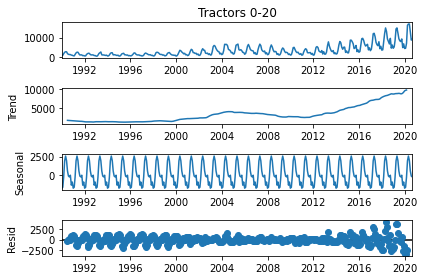

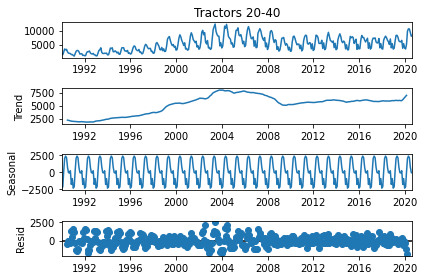

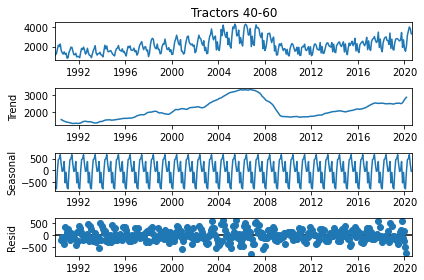

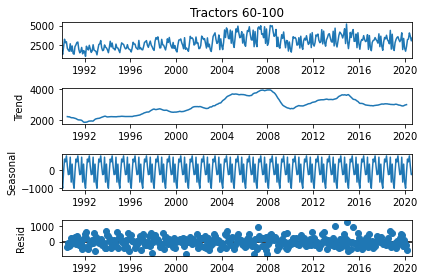

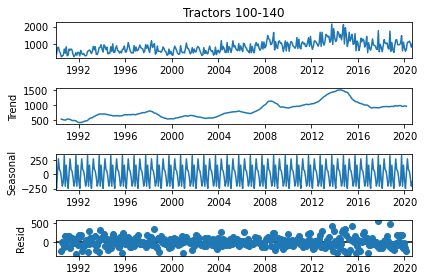

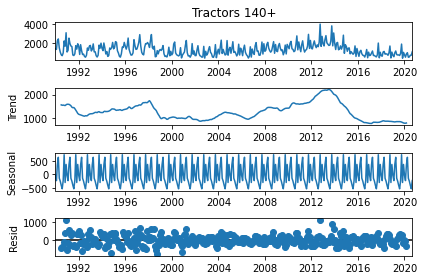

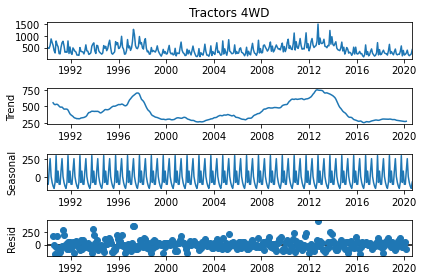

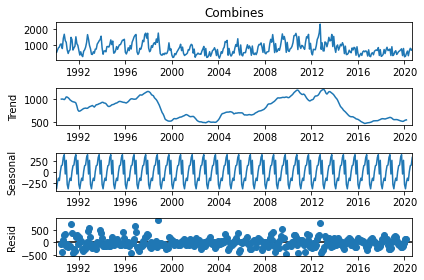

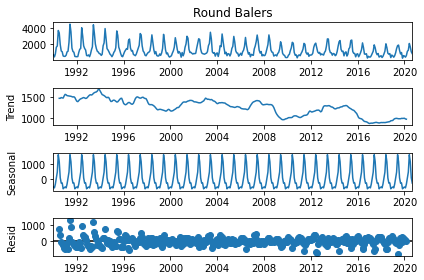

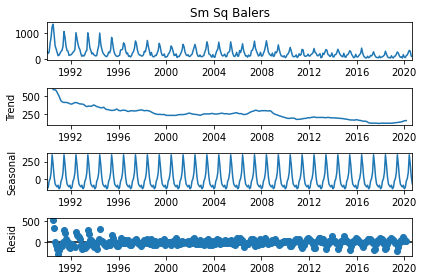

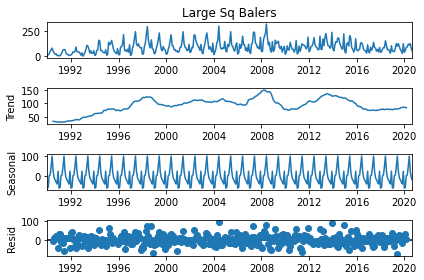

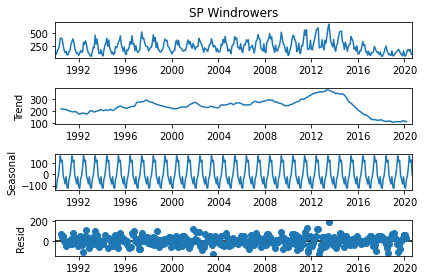

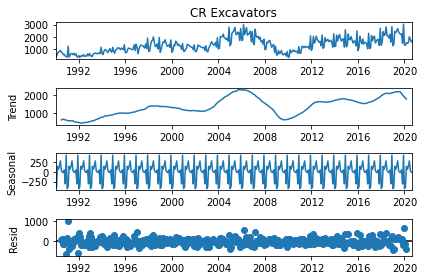

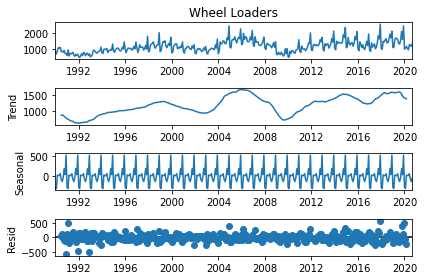

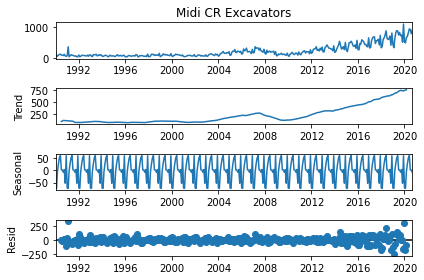

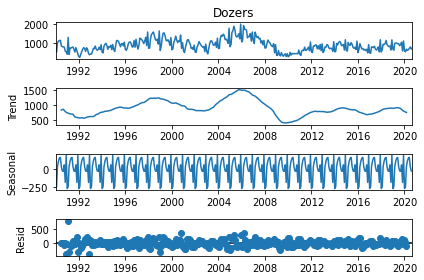

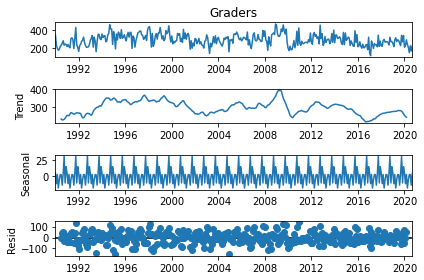

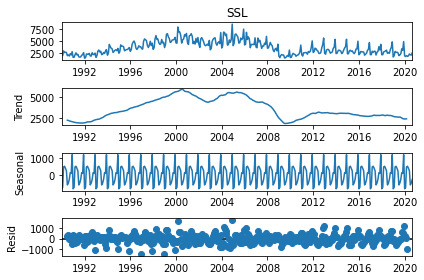

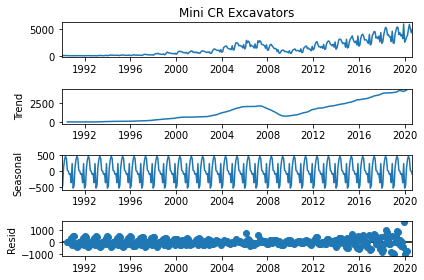

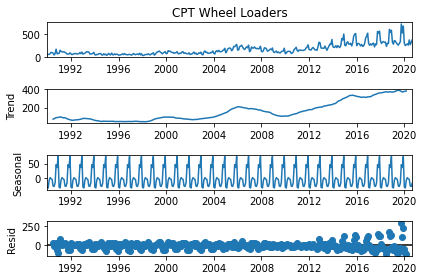

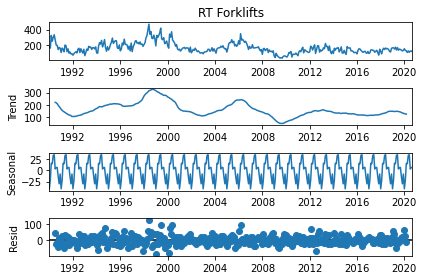

In [15]:
#Analysisng the Trend, Seasonality and Residue components for all the products:
def seasonal(data):
  seasonal_decompose(df1[data],model='additive').plot()

for Name, column in df1.iteritems():
  seasonal(Name)  

In [16]:
from pmdarima.arima import ADFTest

In [17]:
df1.shape

(369, 21)

In [18]:
#Perform ADF Test to check for stationarity:
def ADF_test(data):
  adf_test=ADFTest(alpha=0.05)
  diff = adf_test.should_diff(df1[data])
  print(adf_test,'and',diff,'for the column',data)

for Name, column in df1.iteritems():
  ADF_test(Name)

ADFTest(alpha=0.05, k=None) and (0.01, False) for the column Tractors 0-20
ADFTest(alpha=0.05, k=None) and (0.01, False) for the column Tractors 20-40
ADFTest(alpha=0.05, k=None) and (0.01, False) for the column Tractors 40-60
ADFTest(alpha=0.05, k=None) and (0.01, False) for the column Tractors 60-100
ADFTest(alpha=0.05, k=None) and (0.04966216731677388, False) for the column Tractors 100-140
ADFTest(alpha=0.05, k=None) and (0.01, False) for the column Tractors 140+
ADFTest(alpha=0.05, k=None) and (0.023958250759059954, False) for the column Tractors 4WD
ADFTest(alpha=0.05, k=None) and (0.01, False) for the column Combines
ADFTest(alpha=0.05, k=None) and (0.01, False) for the column Round Balers
ADFTest(alpha=0.05, k=None) and (0.01, False) for the column Sm Sq Balers
ADFTest(alpha=0.05, k=None) and (0.01, False) for the column Large Sq Balers
ADFTest(alpha=0.05, k=None) and (0.01, False) for the column SP Windrowers
ADFTest(alpha=0.05, k=None) and (0.2552427324535217, True) for the c

In [19]:
#Train-Test Split:
def split(data):
  split.train = df1[:300]
  split.test = df1[300:]
  print(split.train.shape,'Training shape for the column',data)
  print(split.test.shape,'Test shape for the column',data)

for Name,column in df1.iteritems():
  split(Name)  

(300, 21) Training shape for the column Tractors 0-20
(69, 21) Test shape for the column Tractors 0-20
(300, 21) Training shape for the column Tractors 20-40
(69, 21) Test shape for the column Tractors 20-40
(300, 21) Training shape for the column Tractors 40-60
(69, 21) Test shape for the column Tractors 40-60
(300, 21) Training shape for the column Tractors 60-100
(69, 21) Test shape for the column Tractors 60-100
(300, 21) Training shape for the column Tractors 100-140
(69, 21) Test shape for the column Tractors 100-140
(300, 21) Training shape for the column Tractors 140+
(69, 21) Test shape for the column Tractors 140+
(300, 21) Training shape for the column Tractors 4WD
(69, 21) Test shape for the column Tractors 4WD
(300, 21) Training shape for the column Combines
(69, 21) Test shape for the column Combines
(300, 21) Training shape for the column Round Balers
(69, 21) Test shape for the column Round Balers
(300, 21) Training shape for the column Sm Sq Balers
(69, 21) Test shape 

In [20]:
#Perform AUTO_ARIMA:
from pmdarima.arima import auto_arima

In [ ]:
#Hyperparameter tuning of (p,d,q) and (P,D,Q):
def calculation(data):
  calculation.arima_model = auto_arima(split.train[data], start_p=0,d=1,start_q=0,
                         max_p=5,max_d=5,max_q=5,start_P=0,
                         D=1,start_Q=0,max_P=5,max_D=5,
                         max_Q=5,m=12,seasonal=True, error_action='warn',trace=True,
                         supress_warnings=True,stepwise=True,random_state=20,n_fits=50)
  print(calculation.arima_model,'for the column',data)
  calculation.arima_model.fit(split.train[data])
  calculation.prediction = pd.DataFrame(calculation.arima_model.predict(n_periods=69),index=split.test[data].index)
  calculation.future_forecast = calculation.arima_model.predict(n_periods=168)
  calculation.future_forecast = pd.DataFrame(calculation.future_forecast)
  calculation.future_forecast_final = calculation.future_forecast.iloc[69:]
  return(calculation.prediction,data,calculation.future_forecast_final)

  

for Name, column in  split.train.iteritems():
   calculation(Name)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4352.987, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4274.340, Time=0.38 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4265.092, Time=0.63 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=4288.999, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=4267.421, Time=0.88 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=4266.995, Time=1.78 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4265.430, Time=0.38 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=4267.244, Time=4.33 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=4298.175, Time=0.48 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=4255.851, Time=1.31 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=4287.833, Time=0.30 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=4256.177, Time=2.20 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=4257.405, Time=3.73 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=4257.630, Time=0.80 sec
 ARIMA(1,1,1)(1,1,2

In [23]:
#Predicting on Test Dataset:
prediction_final = pd.DataFrame()
forecast_df = pd.DataFrame()
for Name, column in  split.train.iteritems():
  get,get_names,get_forecast = calculation(Name)
  prediction_final = pd.concat([get,prediction_final],axis=1)
  forecast_df = pd.concat([get_forecast,forecast_df],axis=1)

  

prediction_final  

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4352.987, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4274.340, Time=0.38 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4265.092, Time=0.64 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=4288.999, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=4267.421, Time=0.89 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=4266.995, Time=1.83 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4265.430, Time=0.38 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=4267.244, Time=4.44 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=4298.175, Time=0.48 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=4255.851, Time=1.33 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=4287.833, Time=0.30 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=4256.177, Time=2.22 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=4257.405, Time=3.74 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=4257.630, Time=0.80 sec
 ARIMA(1,1,1)(1,1,2

0           0  ...            0             0
dRan                                ...                           
2015-01-01   89.230683  337.542910  ...  2759.317238   2362.848243
2015-02-01  117.340653  314.421926  ...  3246.558838   2499.413652
2015-03-01  145.306535  328.338402  ...  6125.648734   3976.870846
2015-04-01  143.365618  349.886541  ...  7933.280323   6949.299521
2015-05-01  161.110064  344.558051  ...  8715.793958   8838.979616
...                ...         ...  ...          ...           ...
2020-05-01  149.444358  651.367510  ...  8394.643410  12247.643133
2020-06-01  152.449144  654.817027  ...  7409.898038  11209.621115
2020-07-01  110.976749  625.012792  ...  5704.555082   9156.723647
2020-08-01  121.084833  629.652118  ...  5299.078660   8077.731761
2020-09-01  130.355070  663.007042  ...  5557.611816   8798.144189

[69 rows x 21 columns]

In [24]:
#Prediction Dataframe:
prediction_final.columns = ['RT Forklifts','CPT Wheel Loaders','Mini CR Excavators','SSL','Graders','Dozers','Midi CR Excavators','Wheel Loaders','CR Excavators','SP Windrowers','Large Sq Balers','Sm Sq Balers','Round Balers','Combines','Tractors 4WD','Tractors 140+','Tractors 100-140','Tractors 60-100','Tractors 40-60','Tractors 20-40','Tractors 0-20']
prediction_final = prediction_final[['Tractors 0-20','Tractors 20-40','Tractors 40-60','Tractors 60-100','Tractors 100-140','Tractors 140+','Tractors 4WD','Combines','Round Balers','Sm Sq Balers',
'Large Sq Balers','SP Windrowers','CR Excavators','Wheel Loaders','Midi CR Excavators','Dozers','Graders','SSL','Mini CR Excavators','CPT Wheel Loaders','RT Forklifts']]
prediction_final

Tractors 0-20  Tractors 20-40  ...  CPT Wheel Loaders  RT Forklifts
dRan                                       ...                                 
2015-01-01    2362.848243     2759.317238  ...         337.542910     89.230683
2015-02-01    2499.413652     3246.558838  ...         314.421926    117.340653
2015-03-01    3976.870846     6125.648734  ...         328.338402    145.306535
2015-04-01    6949.299521     7933.280323  ...         349.886541    143.365618
2015-05-01    8838.979616     8715.793958  ...         344.558051    161.110064
...                   ...             ...  ...                ...           ...
2020-05-01   12247.643133     8394.643410  ...         651.367510    149.444358
2020-06-01   11209.621115     7409.898038  ...         654.817027    152.449144
2020-07-01    9156.723647     5704.555082  ...         625.012792    110.976749
2020-08-01    8077.731761     5299.078660  ...         629.652118    121.084833
2020-09-01    8798.144189     5557.611816  ...         663.007042    130.355070

[69 rows x 21 columns]

In [25]:
#Calculating MAPE for all the products:
def MAPE(data):
  n = 69
  total = 0
  for i in range(n):
    total = total + np.absolute((100*(split.test[data].iloc[i] - prediction_final[data].iloc[i])/split.test[data].iloc[i]))


  mape_value = total/n
  print("MAPE Value: {}".format(round(mape_value,4)),'for the column',data) 

for Name, column in  split.test.iteritems():
   MAPE(Name)

MAPE Value: 13.8953 for the column Tractors 0-20
MAPE Value: 11.9406 for the column Tractors 20-40
MAPE Value: 8.8202 for the column Tractors 40-60
MAPE Value: 56.5987 for the column Tractors 60-100
MAPE Value: 101.8616 for the column Tractors 100-140
MAPE Value: 32.0875 for the column Tractors 140+
MAPE Value: 32.3969 for the column Tractors 4WD
MAPE Value: 42.5851 for the column Combines
MAPE Value: 51.0583 for the column Round Balers
MAPE Value: 31.6901 for the column Sm Sq Balers
MAPE Value: 95.1714 for the column Large Sq Balers
MAPE Value: 187.5551 for the column SP Windrowers
MAPE Value: 24.303 for the column CR Excavators
MAPE Value: 48.6665 for the column Wheel Loaders
MAPE Value: 15.2897 for the column Midi CR Excavators
MAPE Value: 24.8586 for the column Dozers
MAPE Value: 25.7546 for the column Graders
MAPE Value: 35.5852 for the column SSL
MAPE Value: 11.0742 for the column Mini CR Excavators
MAPE Value: 59.7847 for the column CPT Wheel Loaders
MAPE Value: 14.9853 for the 

In [26]:
forecast_df

0            0  ...            0             0
69   106.600164   751.547488  ...  5565.189446   8973.037519
70    88.373898   752.768306  ...  3193.609249   6516.630279
71   106.457178   840.381827  ...  4734.567182   7183.360811
72    76.895198   702.137892  ...  2499.754463   6465.253480
73   104.679520   686.456622  ...  2929.090910   6603.886784
..          ...          ...  ...          ...           ...
163  100.727518  1120.777920  ...  4785.237783  13585.058903
164  109.590217  1154.132844  ...  5043.770938  14305.188878
165   86.451316  1242.673289  ...  5051.348568  14480.178392
166   68.070788  1243.894108  ...  2679.768372  12024.015953
167   85.962930  1331.507629  ...  4220.726304  12690.668243

[99 rows x 21 columns]

In [27]:
#Preparing Forecast dataframe:
forecast_df.columns = ['Forecast_RT Forklifts','Forecast_CPT Wheel Loaders','Forecast_Mini CR Excavators','Forecast_SSL','Forecast_Graders','Forecast_Dozers','Forecast_Midi CR Excavators','Forecast_Wheel Loaders','Forecast_CR Excavators','Forecast_SP Windrowers','Forecast_Large Sq Balers','Forecast_Sm Sq Balers','Forecast_Round Balers','Forecast_Combines','Forecast_Tractors 4WD','Forecast_Tractors 140+','Forecast_Tractors 100-140','Forecast_Tractors 60-100','Forecast_Tractors 40-60','Forecast_Tractors 20-40','Forecast_Tractors 0-20']
forecast_df = forecast_df[['Forecast_Tractors 0-20','Forecast_Tractors 20-40','Forecast_Tractors 40-60','Forecast_Tractors 60-100','Forecast_Tractors 100-140','Forecast_Tractors 140+','Forecast_Tractors 4WD','Forecast_Combines','Forecast_Round Balers','Forecast_Sm Sq Balers',
'Forecast_Large Sq Balers','Forecast_SP Windrowers','Forecast_CR Excavators','Forecast_Wheel Loaders','Forecast_Midi CR Excavators','Forecast_Dozers','Forecast_Graders','Forecast_SSL','Forecast_Mini CR Excavators','Forecast_CPT Wheel Loaders','Forecast_RT Forklifts']]
forecast_df

Forecast_Tractors 0-20  ...  Forecast_RT Forklifts
69              8973.037519  ...             106.600164
70              6516.630279  ...              88.373898
71              7183.360811  ...             106.457178
72              6465.253480  ...              76.895198
73              6603.886784  ...             104.679520
..                      ...  ...                    ...
163            13585.058903  ...             100.727518
164            14305.188878  ...             109.590217
165            14480.178392  ...              86.451316
166            12024.015953  ...              68.070788
167            12690.668243  ...              85.962930

[99 rows x 21 columns]

In [28]:
#Populating future dates:
dRan2 = pd.date_range(start ='2020-10-01', end ='2028-12-01', freq ='MS')
print(dRan2)

DatetimeIndex(['2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01',
               '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01',
               '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01',
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01',
               '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01',
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01',
               '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
               '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01',
               '2023-10-01', '2023-11-01', '2023-12-01', '2024-01-01',
               '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01',
               '2024-06-01', '2024-07-01', '2024-08-01', '2024-09-01',
               '2024-10-01', '2024-11-01', '2024-12-01', '2025-01-01',
               '2025-02-01', '2025-03-01', '2025-04-01', '2025-05-01',
      

In [29]:
forecast_df['dRan2'] = dRan2
forecast_df.head()

Forecast_Tractors 0-20  ...      dRan2
69             8973.037519  ... 2020-10-01
70             6516.630279  ... 2020-11-01
71             7183.360811  ... 2020-12-01
72             6465.253480  ... 2021-01-01
73             6603.886784  ... 2021-02-01

[5 rows x 22 columns]

In [30]:
forecast_df = forecast_df[['dRan2','Forecast_Tractors 0-20','Forecast_Tractors 20-40','Forecast_Tractors 40-60','Forecast_Tractors 60-100','Forecast_Tractors 100-140','Forecast_Tractors 140+','Forecast_Tractors 4WD','Forecast_Combines','Forecast_Round Balers','Forecast_Sm Sq Balers',
'Forecast_Large Sq Balers','Forecast_SP Windrowers','Forecast_CR Excavators','Forecast_Wheel Loaders','Forecast_Midi CR Excavators','Forecast_Dozers','Forecast_Graders','Forecast_SSL','Forecast_Mini CR Excavators','Forecast_CPT Wheel Loaders','Forecast_RT Forklifts']]
forecast_df.tail()

dRan2  ...  Forecast_RT Forklifts
163 2028-08-01  ...             100.727518
164 2028-09-01  ...             109.590217
165 2028-10-01  ...              86.451316
166 2028-11-01  ...              68.070788
167 2028-12-01  ...              85.962930

[5 rows x 22 columns]

In [31]:
#Final Forecast Dataframe:
forecast_df.set_index('dRan2',inplace=True)
forecast_df.head()

Forecast_Tractors 0-20  ...  Forecast_RT Forklifts
dRan2                               ...                       
2020-10-01             8973.037519  ...             106.600164
2020-11-01             6516.630279  ...              88.373898
2020-12-01             7183.360811  ...             106.457178
2021-01-01             6465.253480  ...              76.895198
2021-02-01             6603.886784  ...             104.679520

[5 rows x 21 columns]

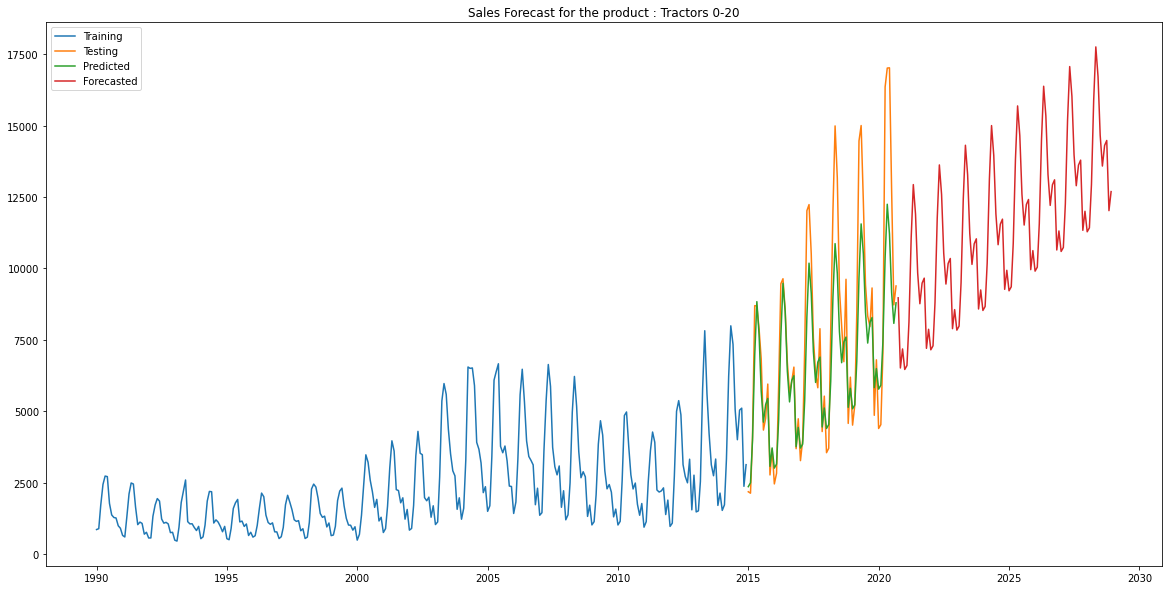

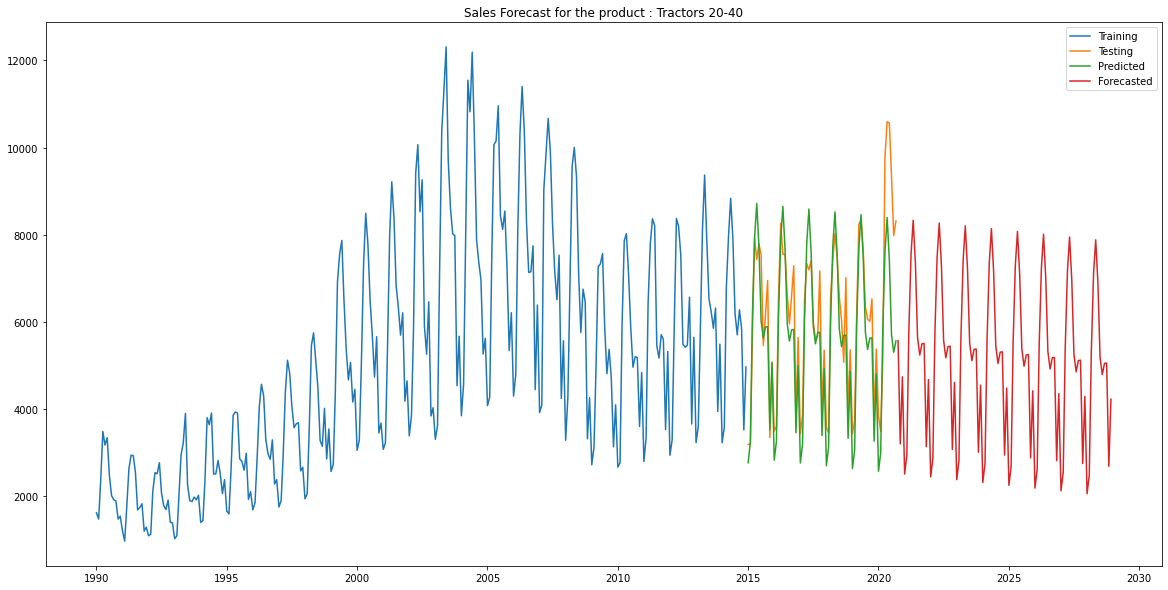

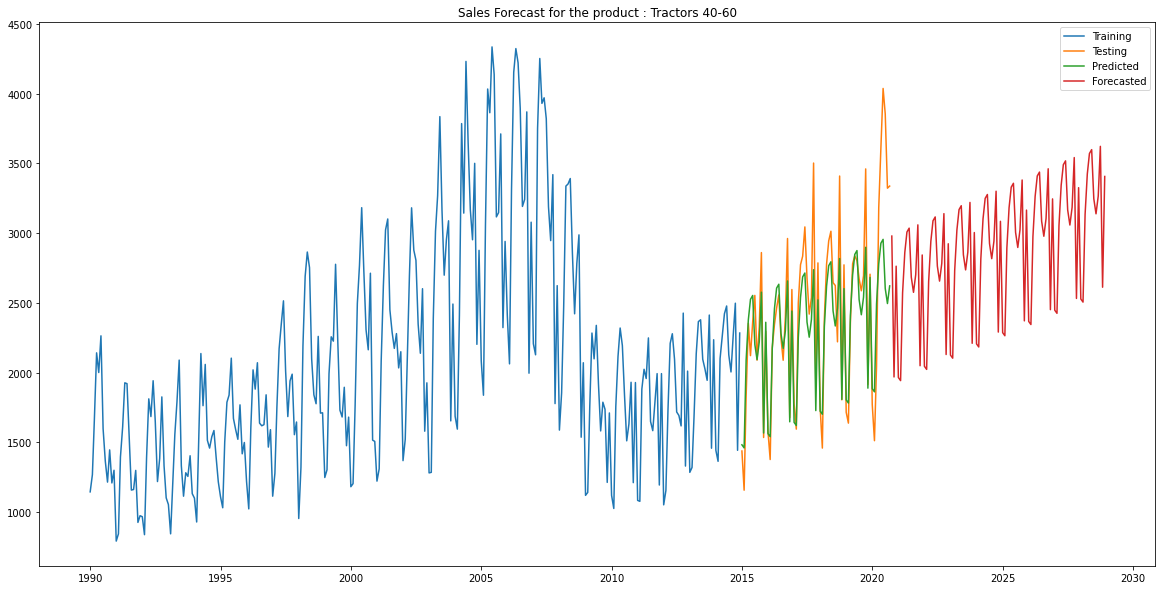

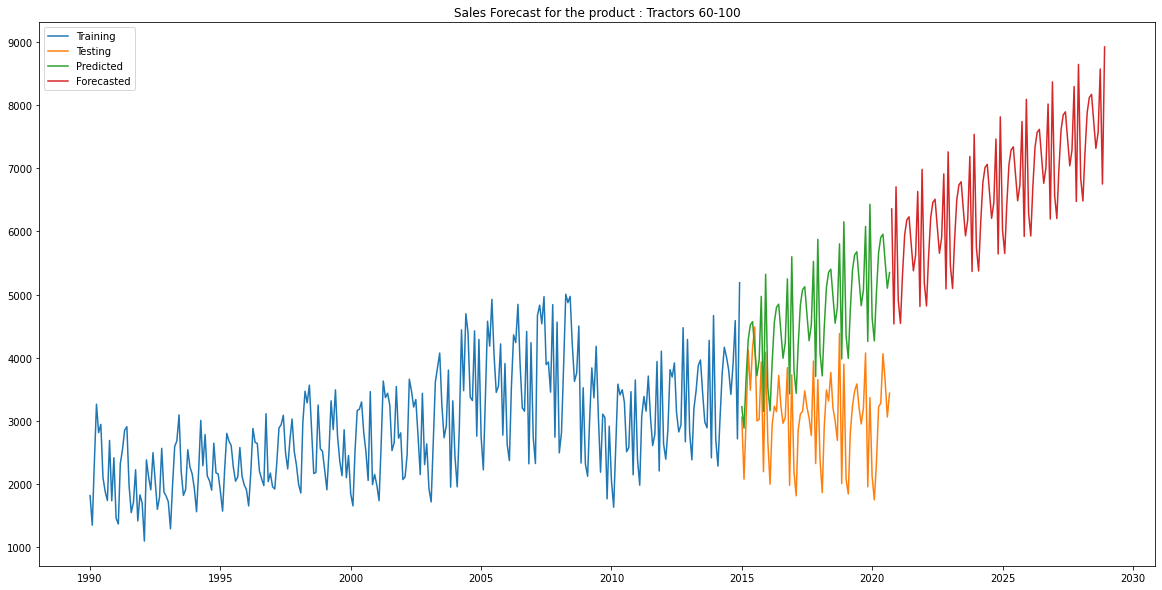

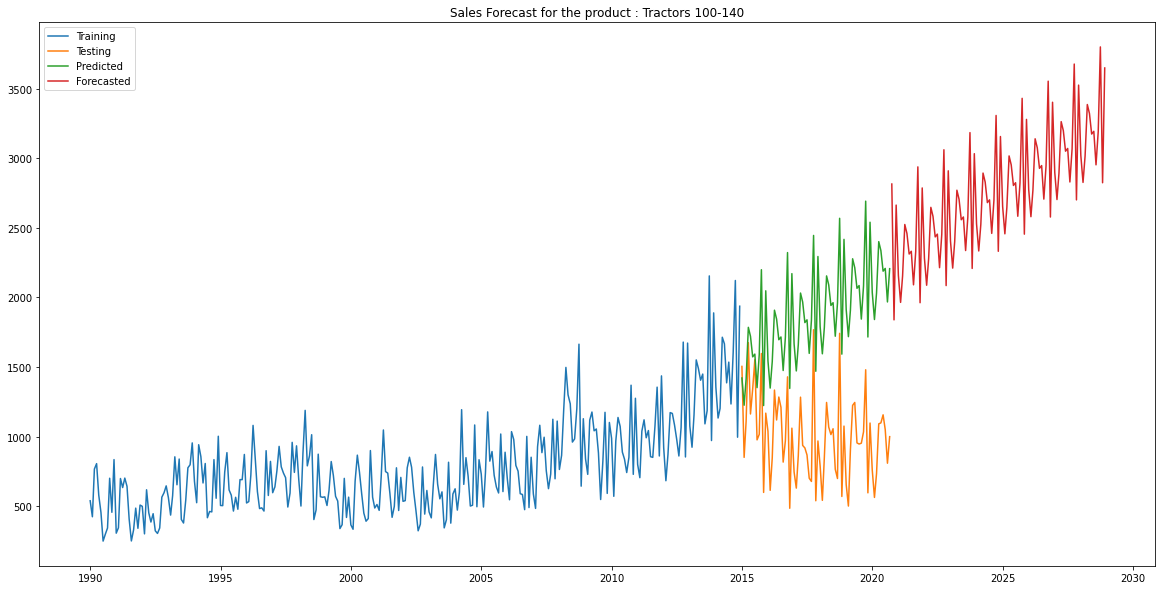

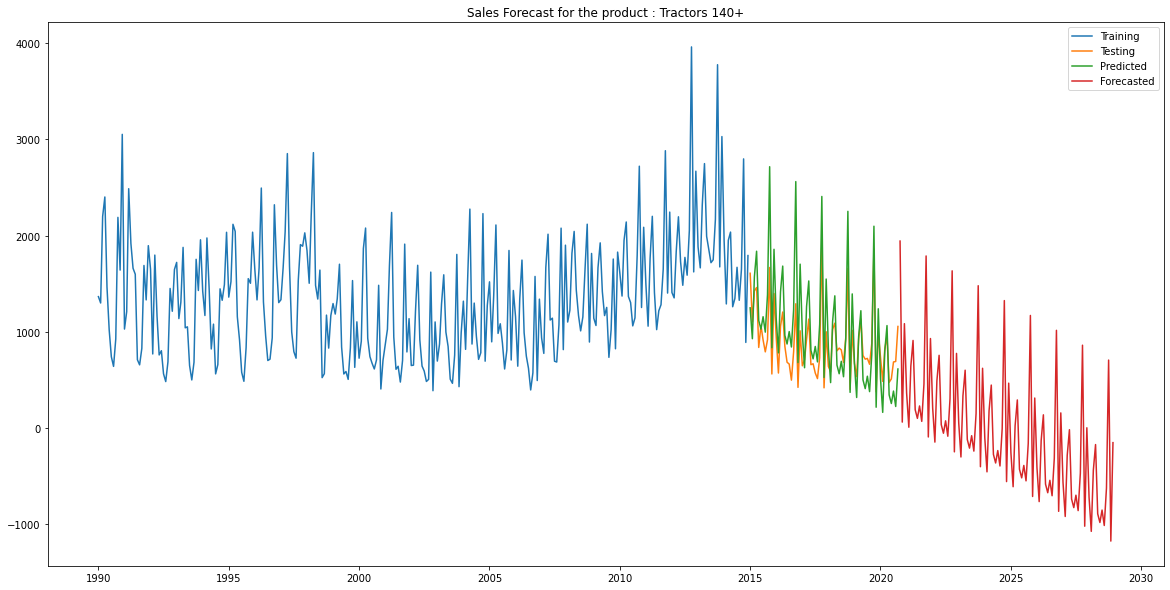

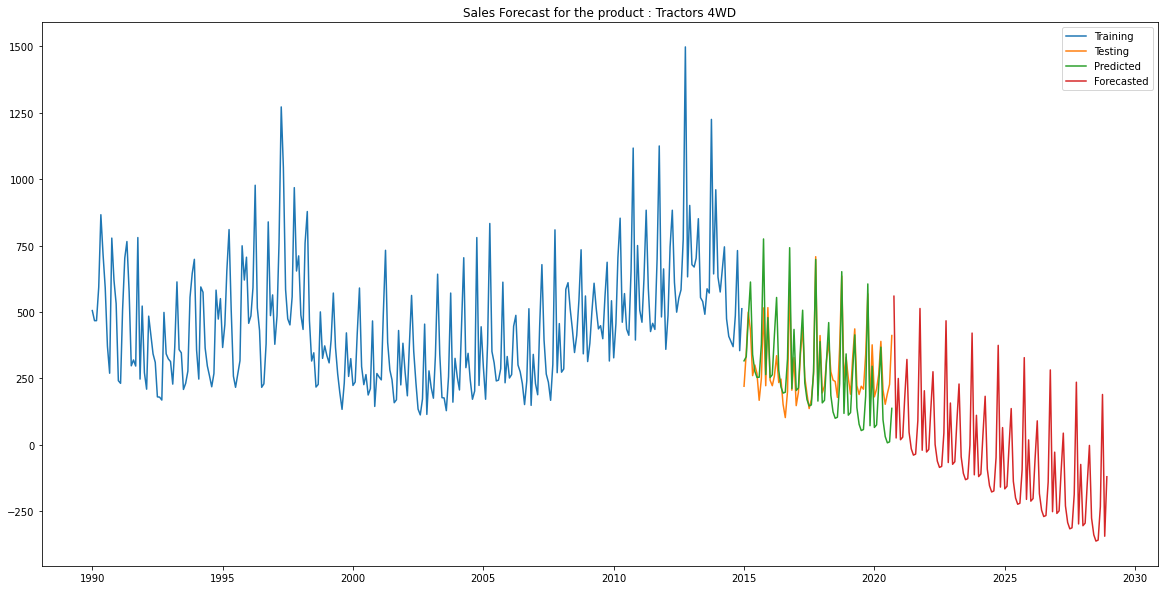

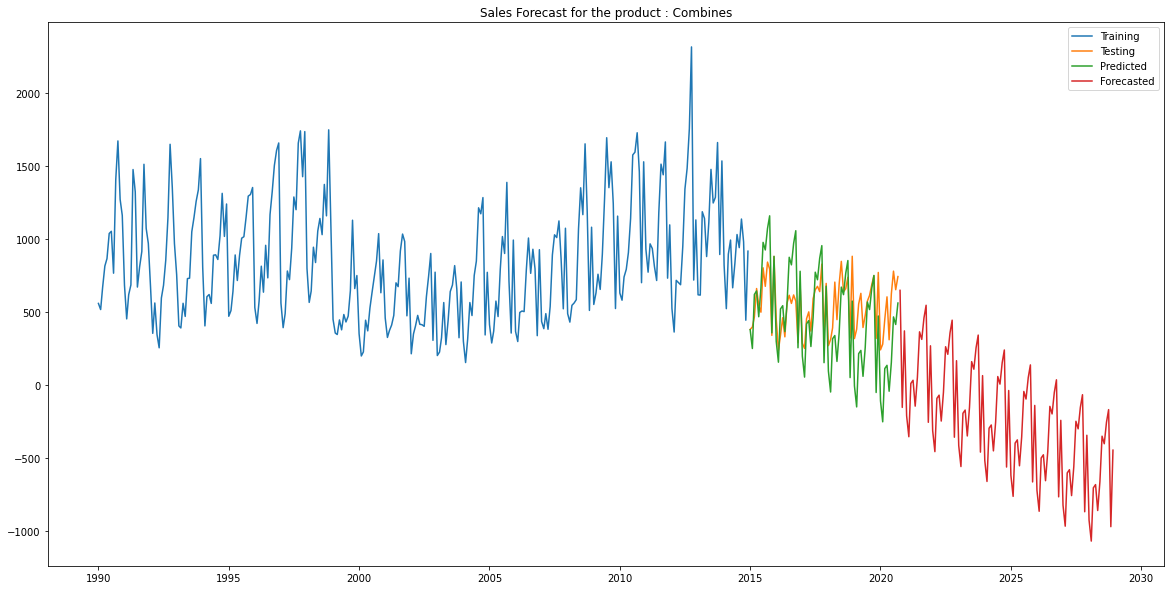

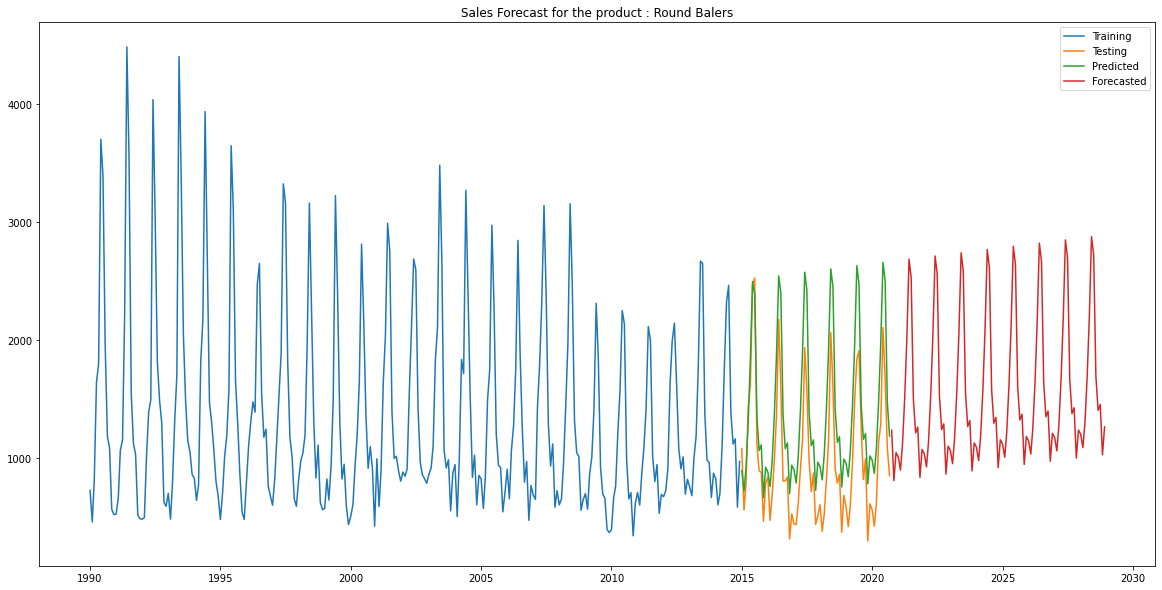

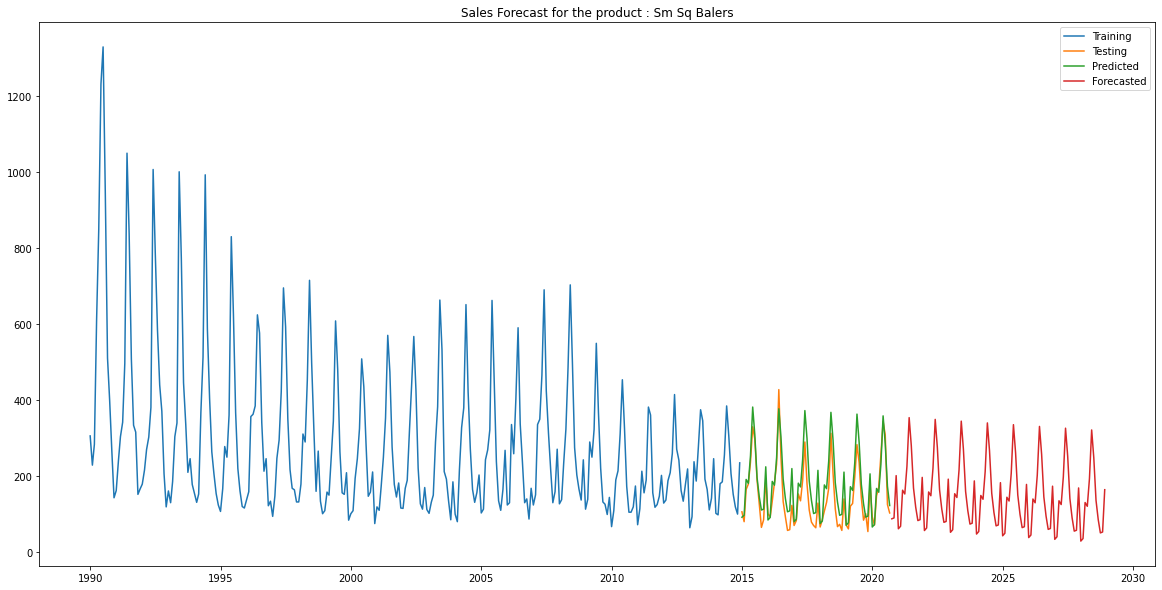

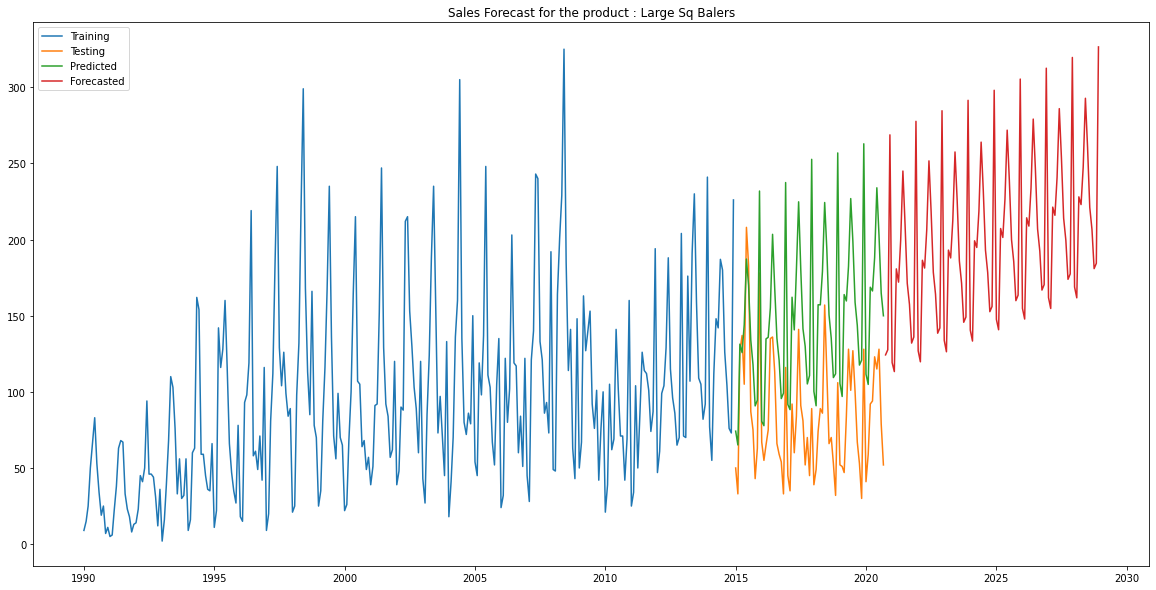

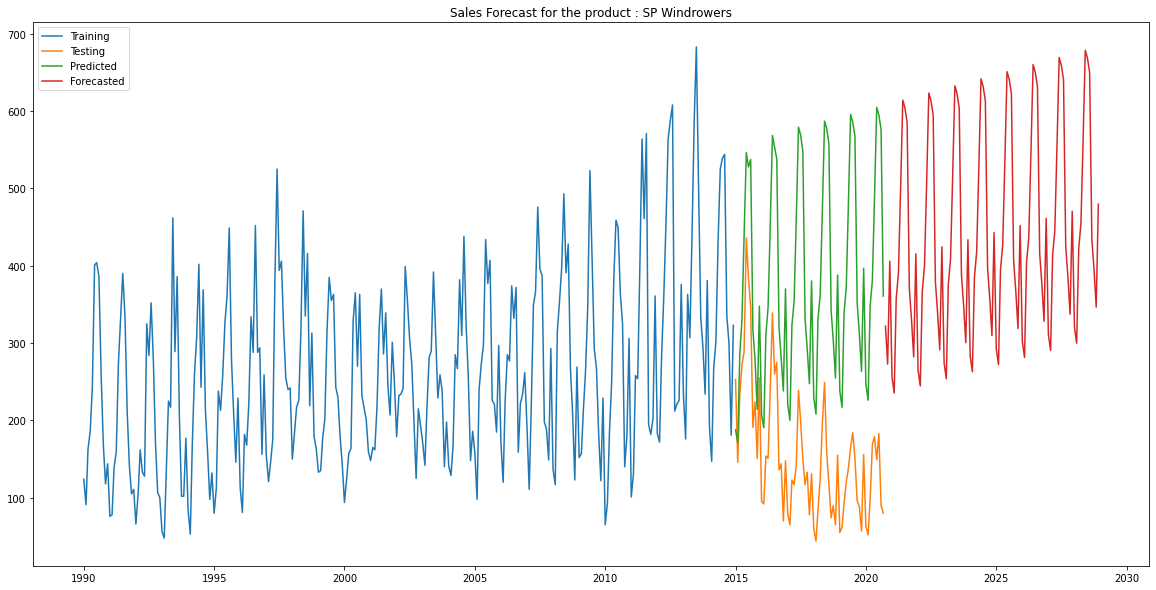

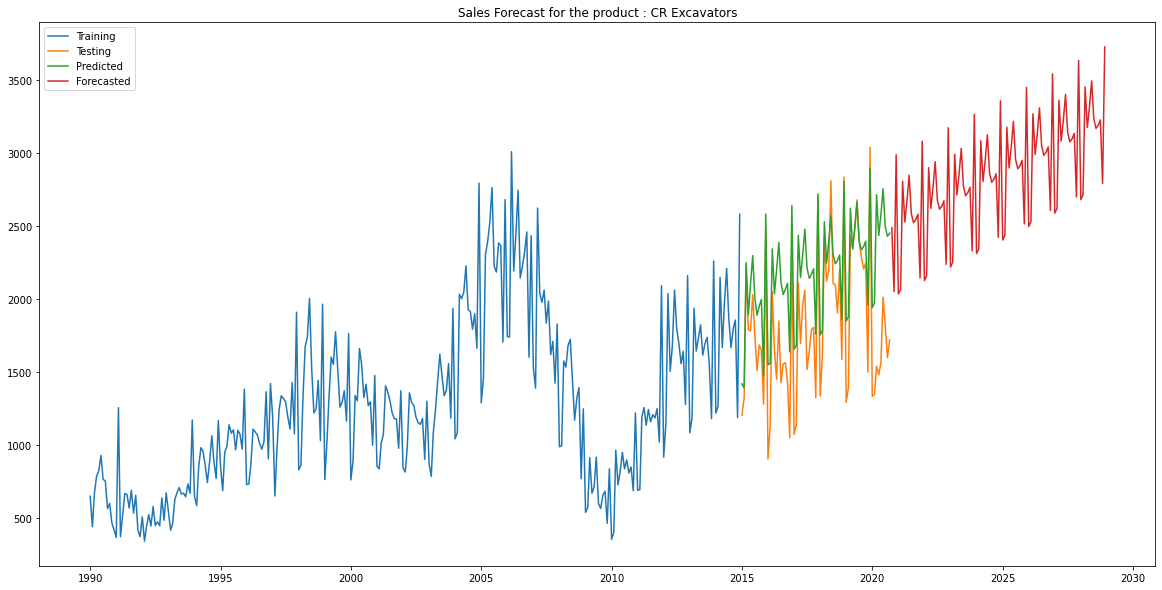

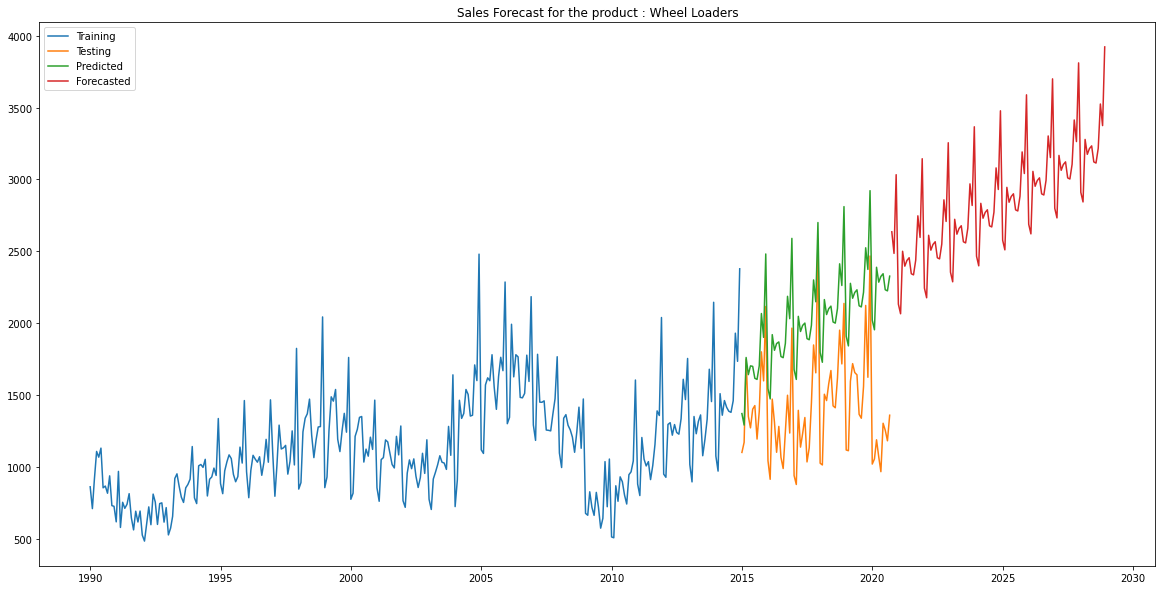

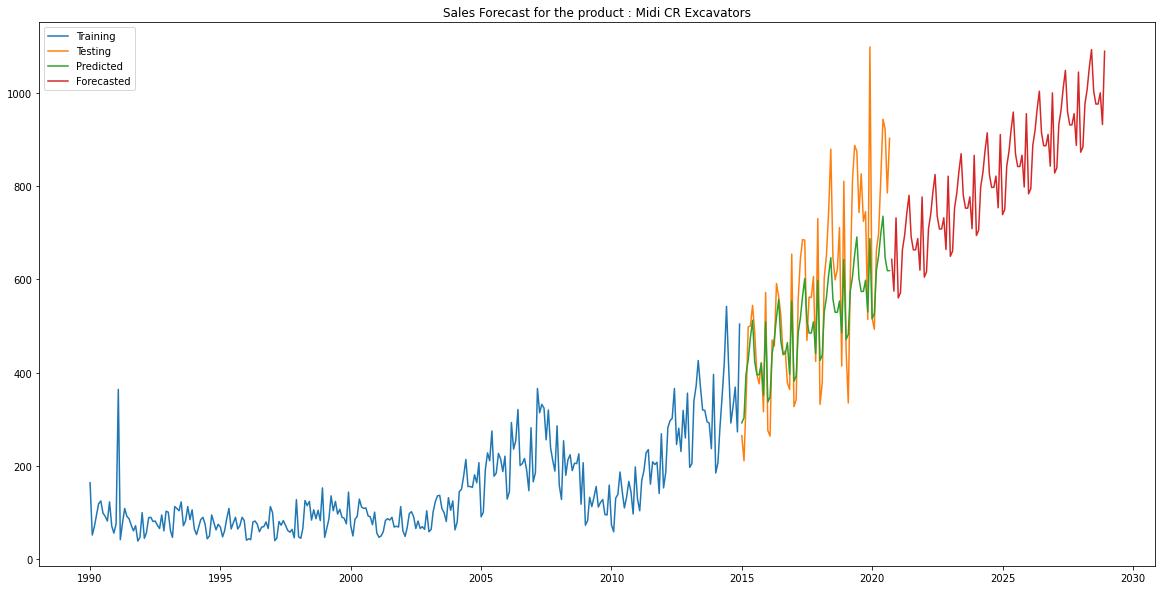

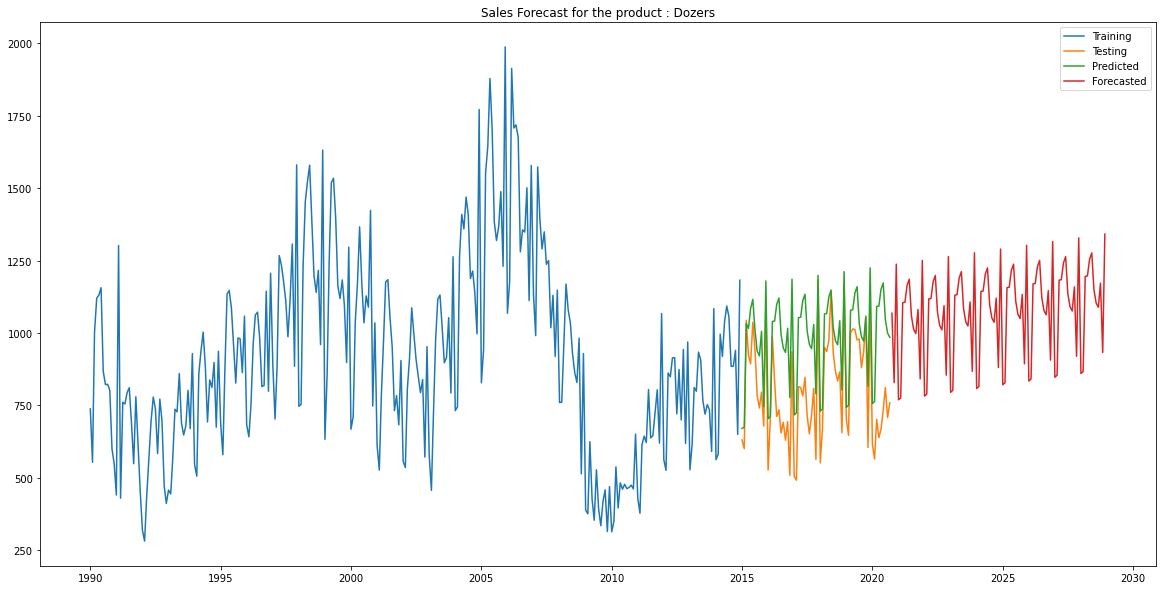

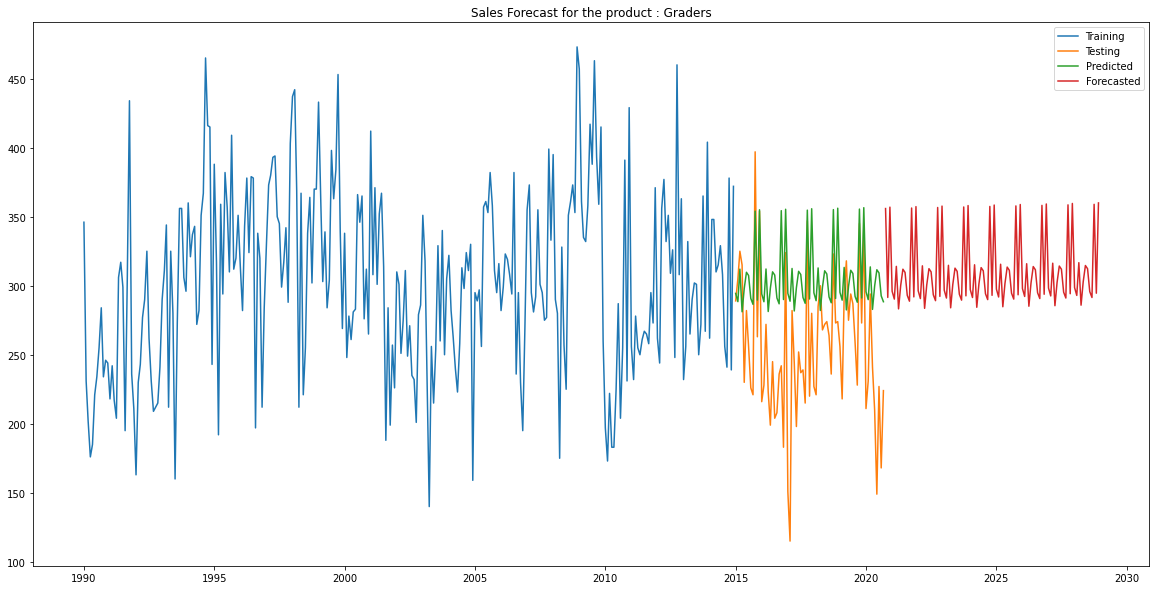

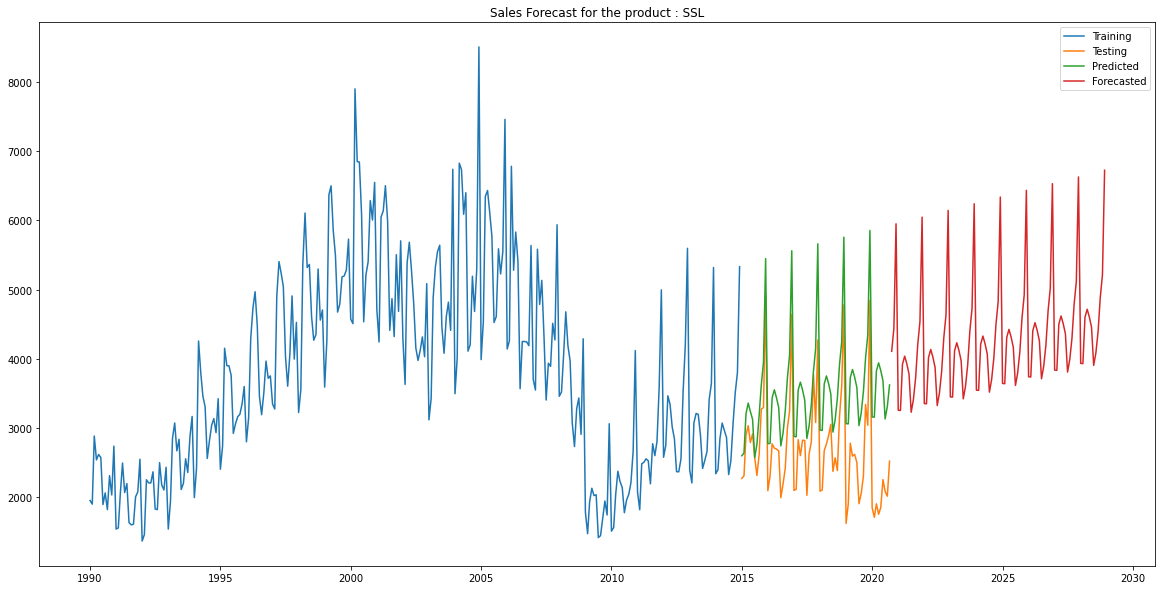

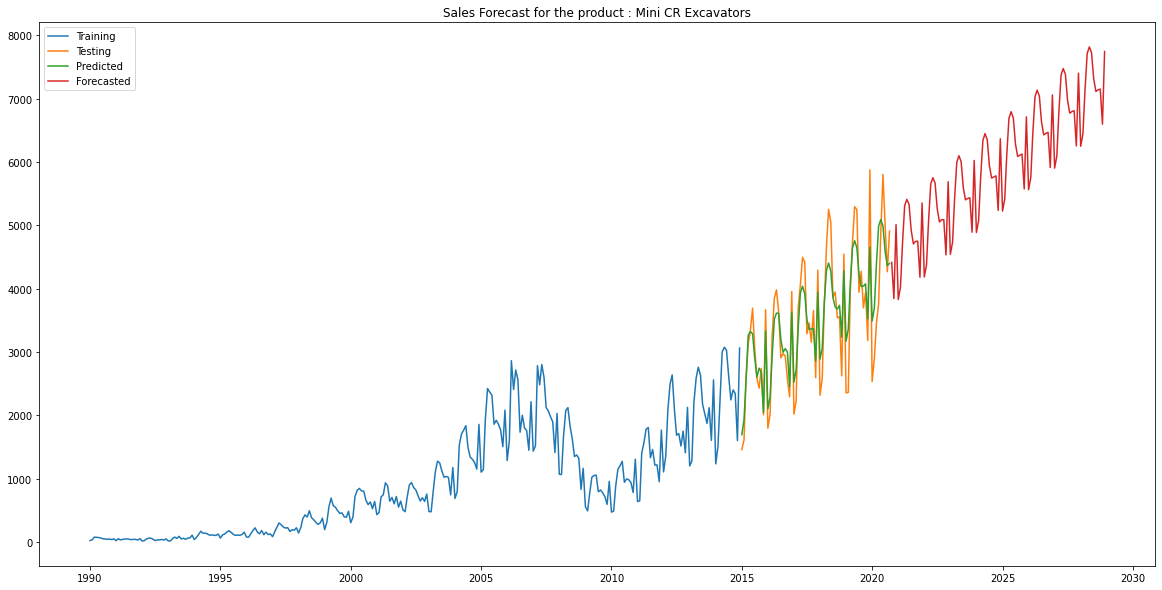

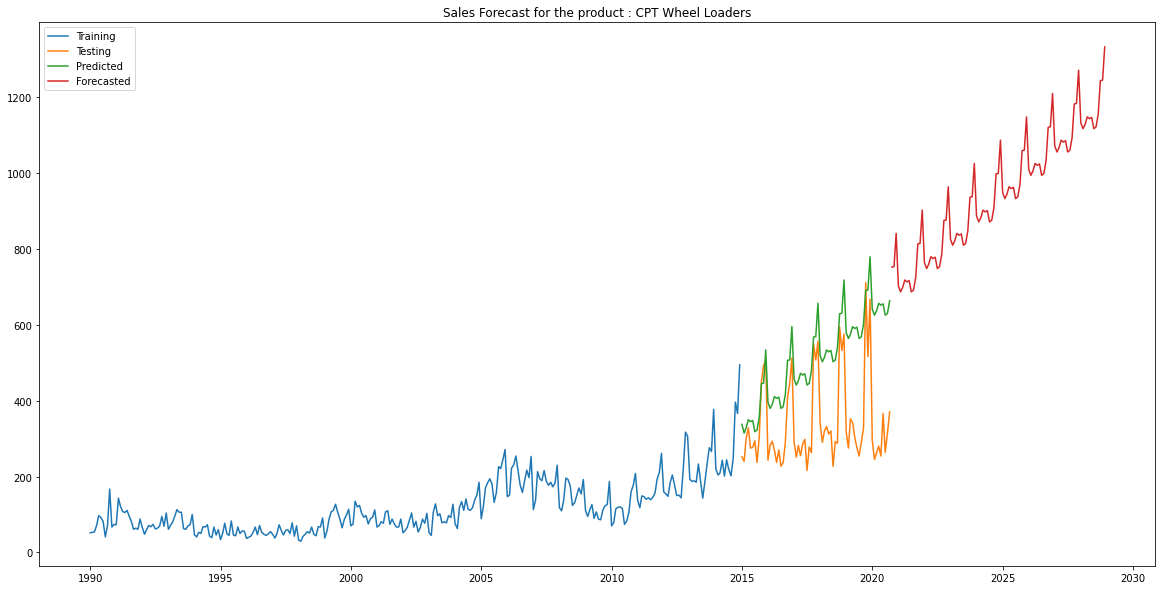

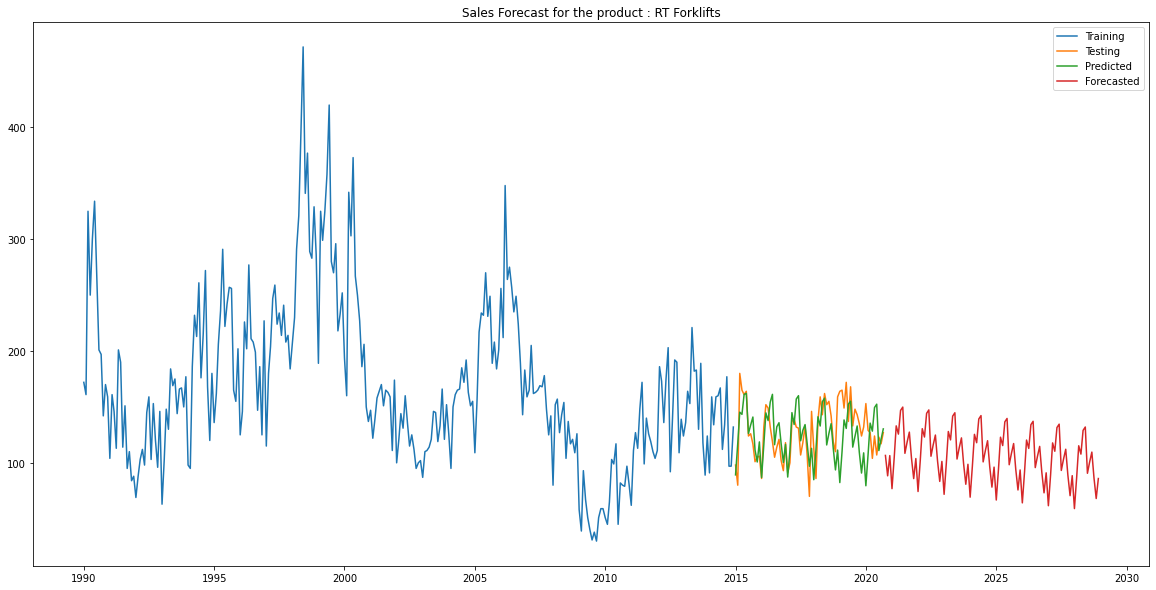

In [32]:
#Plotiing the Train-Test-Prediction and Future forecast sales for all the products:
plt.figure(figsize=(20,10))
plt.plot(split.train['Tractors 0-20'],label='Training')
plt.plot(split.test['Tractors 0-20'],label='Testing')
plt.plot(prediction_final['Tractors 0-20'],label='Predicted')
plt.plot(forecast_df['Forecast_Tractors 0-20'],label='Forecasted')
plt.title('Sales Forecast for the product : Tractors 0-20')
plt.legend(loc='Left corner')
plt.show()

#############################################################

plt.figure(figsize=(20,10))
plt.plot(split.train['Tractors 20-40'],label='Training')
plt.plot(split.test['Tractors 20-40'],label='Testing')
plt.plot(prediction_final['Tractors 20-40'],label='Predicted')
plt.plot(forecast_df['Forecast_Tractors 20-40'],label='Forecasted')
plt.title('Sales Forecast for the product : Tractors 20-40')
plt.legend(loc='Left corner')
plt.show()

#############################################################

plt.figure(figsize=(20,10))
plt.plot(split.train['Tractors 40-60'],label='Training')
plt.plot(split.test['Tractors 40-60'],label='Testing')
plt.plot(prediction_final['Tractors 40-60'],label='Predicted')
plt.plot(forecast_df['Forecast_Tractors 40-60'],label='Forecasted')
plt.title('Sales Forecast for the product : Tractors 40-60')
plt.legend(loc='Left corner')
plt.show()

#############################################################

plt.figure(figsize=(20,10))
plt.plot(split.train['Tractors 60-100'],label='Training')
plt.plot(split.test['Tractors 60-100'],label='Testing')
plt.plot(prediction_final['Tractors 60-100'],label='Predicted')
plt.plot(forecast_df['Forecast_Tractors 60-100'],label='Forecasted')
plt.title('Sales Forecast for the product : Tractors 60-100')
plt.legend(loc='Left corner')
plt.show()

#############################################################

plt.figure(figsize=(20,10))
plt.plot(split.train['Tractors 100-140'],label='Training')
plt.plot(split.test['Tractors 100-140'],label='Testing')
plt.plot(prediction_final['Tractors 100-140'],label='Predicted')
plt.plot(forecast_df['Forecast_Tractors 100-140'],label='Forecasted')
plt.title('Sales Forecast for the product : Tractors 100-140')
plt.legend(loc='Left corner')
plt.show()

#############################################################

plt.figure(figsize=(20,10))
plt.plot(split.train['Tractors 140+'],label='Training')
plt.plot(split.test['Tractors 140+'],label='Testing')
plt.plot(prediction_final['Tractors 140+'],label='Predicted')
plt.plot(forecast_df['Forecast_Tractors 140+'],label='Forecasted')
plt.title('Sales Forecast for the product : Tractors 140+')
plt.legend(loc='Left corner')
plt.show()

#############################################################

plt.figure(figsize=(20,10))
plt.plot(split.train['Tractors 4WD'],label='Training')
plt.plot(split.test['Tractors 4WD'],label='Testing')
plt.plot(prediction_final['Tractors 4WD'],label='Predicted')
plt.plot(forecast_df['Forecast_Tractors 4WD'],label='Forecasted')
plt.title('Sales Forecast for the product : Tractors 4WD')
plt.legend(loc='Left corner')
plt.show()

#############################################################

plt.figure(figsize=(20,10))
plt.plot(split.train['Combines'],label='Training')
plt.plot(split.test['Combines'],label='Testing')
plt.plot(prediction_final['Combines'],label='Predicted')
plt.plot(forecast_df['Forecast_Combines'],label='Forecasted')
plt.title('Sales Forecast for the product : Combines')
plt.legend(loc='Left corner')
plt.show()

#############################################################

plt.figure(figsize=(20,10))
plt.plot(split.train['Round Balers'],label='Training')
plt.plot(split.test['Round Balers'],label='Testing')
plt.plot(prediction_final['Round Balers'],label='Predicted')
plt.plot(forecast_df['Forecast_Round Balers'],label='Forecasted')
plt.title('Sales Forecast for the product : Round Balers')
plt.legend(loc='Left corner')
plt.show()

#############################################################

plt.figure(figsize=(20,10))
plt.plot(split.train['Sm Sq Balers'],label='Training')
plt.plot(split.test['Sm Sq Balers'],label='Testing')
plt.plot(prediction_final['Sm Sq Balers'],label='Predicted')
plt.plot(forecast_df['Forecast_Sm Sq Balers'],label='Forecasted')
plt.title('Sales Forecast for the product : Sm Sq Balers')
plt.legend(loc='Left corner')
plt.show()

#############################################################

plt.figure(figsize=(20,10))
plt.plot(split.train['Large Sq Balers'],label='Training')
plt.plot(split.test['Large Sq Balers'],label='Testing')
plt.plot(prediction_final['Large Sq Balers'],label='Predicted')
plt.plot(forecast_df['Forecast_Large Sq Balers'],label='Forecasted')
plt.title('Sales Forecast for the product : Large Sq Balers')
plt.legend(loc='Left corner')
plt.show()

#############################################################

plt.figure(figsize=(20,10))
plt.plot(split.train['SP Windrowers'],label='Training')
plt.plot(split.test['SP Windrowers'],label='Testing')
plt.plot(prediction_final['SP Windrowers'],label='Predicted')
plt.plot(forecast_df['Forecast_SP Windrowers'],label='Forecasted')
plt.title('Sales Forecast for the product : SP Windrowers')
plt.legend(loc='Left corner')
plt.show()

#############################################################

plt.figure(figsize=(20,10))
plt.plot(split.train['CR Excavators'],label='Training')
plt.plot(split.test['CR Excavators'],label='Testing')
plt.plot(prediction_final['CR Excavators'],label='Predicted')
plt.plot(forecast_df['Forecast_CR Excavators'],label='Forecasted')
plt.title('Sales Forecast for the product : CR Excavators')
plt.legend(loc='Left corner')
plt.show()

#############################################################

plt.figure(figsize=(20,10))
plt.plot(split.train['Wheel Loaders'],label='Training')
plt.plot(split.test['Wheel Loaders'],label='Testing')
plt.plot(prediction_final['Wheel Loaders'],label='Predicted')
plt.plot(forecast_df['Forecast_Wheel Loaders'],label='Forecasted')
plt.title('Sales Forecast for the product : Wheel Loaders')
plt.legend(loc='Left corner')
plt.show()

#############################################################

plt.figure(figsize=(20,10))
plt.plot(split.train['Midi CR Excavators'],label='Training')
plt.plot(split.test['Midi CR Excavators'],label='Testing')
plt.plot(prediction_final['Midi CR Excavators'],label='Predicted')
plt.plot(forecast_df['Forecast_Midi CR Excavators'],label='Forecasted')
plt.title('Sales Forecast for the product : Midi CR Excavators')
plt.legend(loc='Left corner')
plt.show()

#############################################################

plt.figure(figsize=(20,10))
plt.plot(split.train['Dozers'],label='Training')
plt.plot(split.test['Dozers'],label='Testing')
plt.plot(prediction_final['Dozers'],label='Predicted')
plt.plot(forecast_df['Forecast_Dozers'],label='Forecasted')
plt.title('Sales Forecast for the product : Dozers')
plt.legend(loc='Left corner')
plt.show()

#############################################################

plt.figure(figsize=(20,10))
plt.plot(split.train['Graders'],label='Training')
plt.plot(split.test['Graders'],label='Testing')
plt.plot(prediction_final['Graders'],label='Predicted')
plt.plot(forecast_df['Forecast_Graders'],label='Forecasted')
plt.title('Sales Forecast for the product : Graders')
plt.legend(loc='Left corner')
plt.show()

#############################################################

plt.figure(figsize=(20,10))
plt.plot(split.train['SSL'],label='Training')
plt.plot(split.test['SSL'],label='Testing')
plt.plot(prediction_final['SSL'],label='Predicted')
plt.plot(forecast_df['Forecast_SSL'],label='Forecasted')
plt.title('Sales Forecast for the product : SSL')
plt.legend(loc='Left corner')
plt.show()

#############################################################

plt.figure(figsize=(20,10))
plt.plot(split.train['Mini CR Excavators'],label='Training')
plt.plot(split.test['Mini CR Excavators'],label='Testing')
plt.plot(prediction_final['Mini CR Excavators'],label='Predicted')
plt.plot(forecast_df['Forecast_Mini CR Excavators'],label='Forecasted')
plt.title('Sales Forecast for the product : Mini CR Excavators')
plt.legend(loc='Left corner')
plt.show()

#############################################################

plt.figure(figsize=(20,10))
plt.plot(split.train['CPT Wheel Loaders'],label='Training')
plt.plot(split.test['CPT Wheel Loaders'],label='Testing')
plt.plot(prediction_final['CPT Wheel Loaders'],label='Predicted')
plt.plot(forecast_df['Forecast_CPT Wheel Loaders'],label='Forecasted')
plt.title('Sales Forecast for the product : CPT Wheel Loaders')
plt.legend(loc='Left corner')
plt.show()

#############################################################

plt.figure(figsize=(20,10))
plt.plot(split.train['RT Forklifts'],label='Training')
plt.plot(split.test['RT Forklifts'],label='Testing')
plt.plot(prediction_final['RT Forklifts'],label='Predicted')
plt.plot(forecast_df['Forecast_RT Forklifts'],label='Forecasted')
plt.title('Sales Forecast for the product : RT Forklifts')
plt.legend(loc='Left corner')
plt.show()

### For products having null values :

In [33]:
#Dropping the NaN rows:
df_new = df_new.dropna(axis = 0, how ='any') 
df_new.head()

dRan  Disc MC  SP Forage  ...  Compaction    TLB  Cpt Tracked Loaders
228 2009-01-01    253.0        8.0  ...       375.0  653.0                644.0
229 2009-02-01    296.0       18.0  ...       595.0  564.0                483.0
230 2009-03-01    461.0       25.0  ...       630.0  974.0                750.0
231 2009-04-01    509.0       64.0  ...       554.0  748.0                914.0
232 2009-05-01    753.0       63.0  ...       717.0  694.0                968.0

[5 rows x 8 columns]

In [34]:
#Analysis of all the products present in the df_new dataframe:
fig = px.line(df_new, x='dRan', y='Disc MC', title='Disc MC Sales with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()
#####################################################################################################
fig = px.line(df_new, x='dRan', y='SP Forage', title='SP Forage Sales with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()
#####################################################################################################
fig = px.line(df_new, x='dRan', y='FF Planters', title='FF Planters Sales with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()
#####################################################################################################
fig = px.line(df_new, x='dRan', y='SP Sprayers', title='SP Sprayers Sales with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()
#####################################################################################################
fig = px.line(df_new, x='dRan', y='Compaction', title='Compaction Sales with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()
#####################################################################################################
fig = px.line(df_new, x='dRan', y='TLB', title='TLB Sales with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()
#####################################################################################################
fig = px.line(df_new, x='dRan', y='Cpt Tracked Loaders', title='Cpt Tracked Loaders Sales with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [35]:
#Analysing the df_new dataframe:
df_new.set_index('dRan',inplace=True)
df_new.head()

Disc MC  SP Forage  ...    TLB  Cpt Tracked Loaders
dRan                            ...                            
2009-01-01    253.0        8.0  ...  653.0                644.0
2009-02-01    296.0       18.0  ...  564.0                483.0
2009-03-01    461.0       25.0  ...  974.0                750.0
2009-04-01    509.0       64.0  ...  748.0                914.0
2009-05-01    753.0       63.0  ...  694.0                968.0

[5 rows x 7 columns]

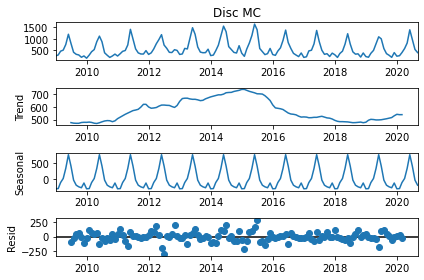

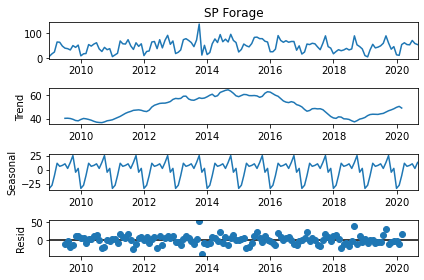

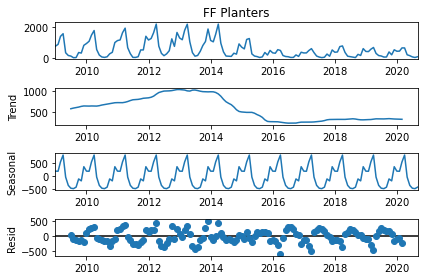

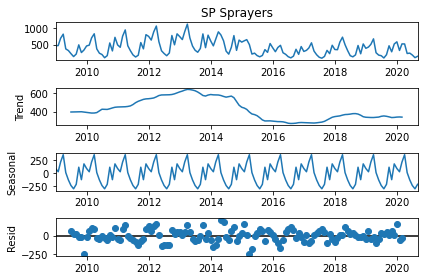

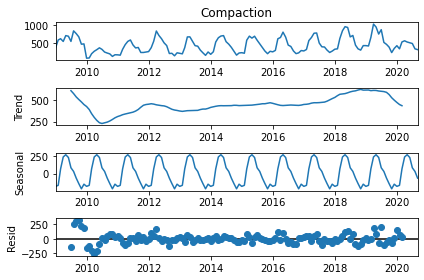

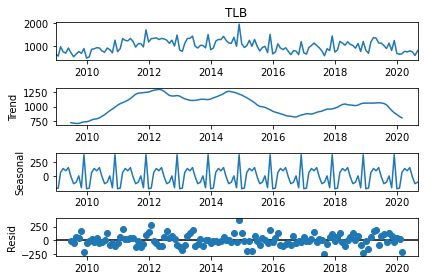

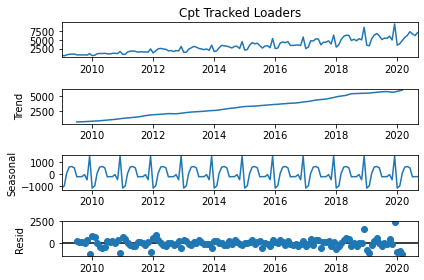

In [36]:
#Analysing the Trend, Seasonality and Residue for all products:
def seasonal2(data):
  seasonal_decompose(df_new[data],model='additive').plot()

for Name, column in df_new.iteritems():
  seasonal2(Name)  

In [37]:
#Shape of the dataframe:
df_new.shape

(141, 7)

In [38]:
#Perform ADF Test to check for stationarity:
def ADF_test2(data):
  adf_test=ADFTest(alpha=0.05)
  diff = adf_test.should_diff(df_new[data])
  print(adf_test,'and',diff,'for the column',data)

for Name, column in df_new.iteritems():
  ADF_test2(Name)

ADFTest(alpha=0.05, k=None) and (0.01, False) for the column Disc MC
ADFTest(alpha=0.05, k=None) and (0.01, False) for the column SP Forage
ADFTest(alpha=0.05, k=None) and (0.01, False) for the column FF Planters
ADFTest(alpha=0.05, k=None) and (0.014176761677401246, False) for the column SP Sprayers
ADFTest(alpha=0.05, k=None) and (0.01, False) for the column Compaction
ADFTest(alpha=0.05, k=None) and (0.6413318234083969, True) for the column TLB
ADFTest(alpha=0.05, k=None) and (0.01, False) for the column Cpt Tracked Loaders


In [39]:
#Splitting into Train-Test Split:
def split2(data):
  split2.train2 = df_new[:100]
  split2.test2 = df_new[100:]
  print(split2.train2.shape,'Training shape for the column',data)
  print(split2.test2.shape,'Test shape for the column',data)

for Name,column in df_new.iteritems():
  split2(Name)  

(100, 7) Training shape for the column Disc MC
(41, 7) Test shape for the column Disc MC
(100, 7) Training shape for the column SP Forage
(41, 7) Test shape for the column SP Forage
(100, 7) Training shape for the column FF Planters
(41, 7) Test shape for the column FF Planters
(100, 7) Training shape for the column SP Sprayers
(41, 7) Test shape for the column SP Sprayers
(100, 7) Training shape for the column Compaction
(41, 7) Test shape for the column Compaction
(100, 7) Training shape for the column TLB
(41, 7) Test shape for the column TLB
(100, 7) Training shape for the column Cpt Tracked Loaders
(41, 7) Test shape for the column Cpt Tracked Loaders


In [40]:
#Hyperparameter Tuning of (p,d,q) and (P,D,Q):
def calculation2(data):
  calculation2.arima_model2 = auto_arima(split2.train2[data], start_p=0,d=1,start_q=0,
                         max_p=5,max_d=5,max_q=5,start_P=0,
                         D=1,start_Q=0,max_P=5,max_D=5,
                         max_Q=5,m=12,seasonal=True, error_action='warn',trace=True,
                         supress_warnings=True,stepwise=True,random_state=20,n_fits=50)
  print(calculation2.arima_model2,'for the column',data)
  calculation2.arima_model2.fit(split2.train2[data])
  calculation2.prediction2 = pd.DataFrame(calculation2.arima_model2.predict(n_periods=41),index=split2.test2[data].index)
  calculation2.future_forecast2 = calculation2.arima_model2.predict(n_periods=140)
  calculation2.future_forecast2 = pd.DataFrame(calculation2.future_forecast2)
  calculation2.future_forecast_final2 = calculation2.future_forecast2.iloc[41:]
  return(calculation2.prediction2,data,calculation2.future_forecast_final2)

  

for Name, column in  split2.train2.iteritems():
   calculation2(Name)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1123.530, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1097.782, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1080.567, Time=0.30 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1104.824, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1082.498, Time=0.89 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1082.523, Time=1.39 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1088.108, Time=0.24 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.34 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1090.529, Time=0.33 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1074.572, Time=0.57 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1099.599, Time=0.15 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1076.371, Time=0.72 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=inf, Time=1.65 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1083.883, Time=0.47 sec
 ARIMA(1,1,1)(1,1,2)[12]     

In [41]:
#Calculating the prediction sales on test dataset:
prediction_final2 = pd.DataFrame()
forecast_df2 = pd.DataFrame()
for Name, column in  split2.train2.iteritems():
  get,get_names,get_forecast = calculation2(Name)
  prediction_final2 = pd.concat([get,prediction_final2],axis=1)
  forecast_df2 = pd.concat([get_forecast,forecast_df2],axis=1)

  

prediction_final2 

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1123.530, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1097.782, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1080.567, Time=0.29 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1104.824, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1082.498, Time=0.91 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1082.523, Time=1.41 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1088.108, Time=0.24 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.32 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1090.529, Time=0.32 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1074.572, Time=0.57 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1099.599, Time=0.15 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1076.371, Time=0.72 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=inf, Time=1.65 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1083.883, Time=0.48 sec
 ARIMA(1,1,1)(1,1,2)[12]     

0            0  ...          0            0
dRan                                  ...                        
2017-05-01  4542.745872   925.728352  ...  62.716846   865.462833
2017-06-01  4888.745872  1056.776536  ...  63.807885  1310.366904
2017-07-01  3797.745872   856.083860  ...  69.178993   943.752529
2017-08-01  3766.745872   715.828047  ...  60.376046   457.169981
2017-09-01  3866.745872   813.773652  ...  62.104965   285.328423
2017-10-01  3900.745872   873.640524  ...  80.323855   203.941612
2017-11-01  3769.745872   668.176008  ...  47.254914   195.719766
2017-12-01  6171.745872  1309.163902  ...  56.967587   355.752308
2018-01-01  2889.745872   673.909637  ...  19.377400   133.885226
2018-02-01  3311.745872   677.437816  ...  26.641350   133.188091
2018-03-01  5116.745872   953.483886  ...  43.841032   345.683465
2018-04-01  5040.745872   986.705889  ...  67.698572   463.123624
2018-05-01  4897.491744   910.954509  ...  63.535571   796.201621
2018-06-01  5243.491744  1042.002693  ...  64.626610  1229.117545
2018-07-01  4152.491744   841.310017  ...  69.997718   856.867043
2018-08-01  4121.491744   701.054204  ...  61.194771   367.109120
2018-09-01  4221.491744   798.999809  ...  62.923690   193.045472
2018-10-01  4255.491744   858.866681  ...  81.142580   109.805871
2018-11-01  4124.491744   653.402165  ...  48.073639    99.874301
2018-12-01  6526.491744  1294.390059  ...  57.786312   258.252542
2019-01-01  3244.491744   659.135794  ...  20.196125    34.752630
2019-02-01  3666.491744   662.663973  ...  27.460075    32.430982
2019-03-01  5471.491744   938.710043  ...  44.659758   243.305066
2019-04-01  5395.491744   971.932045  ...  68.517297   359.125182
2019-05-01  5252.237617   896.180666  ...  64.354296   690.583621
2019-06-01  5598.237617  1027.228850  ...  65.445336  1121.880174
2019-07-01  4507.237617   826.536174  ...  70.816443   748.010373
2019-08-01  4476.237617   686.280361  ...  62.013496   256.633180
2019-09-01  4576.237617   784.225966  ...  63.742415    80.950272
2019-10-01  4610.237617   844.092838  ...  81.961305    -3.908584
2019-11-01  4479.237617   638.628321  ...  48.892365   -15.459408
2019-12-01  6881.237617  1279.616216  ...  58.605037   141.299580
2020-01-01  3599.237617   644.361951  ...  21.014850   -83.819584
2020-02-01  4021.237617   647.890130  ...  28.278800   -87.760486
2020-03-01  5826.237617   923.936199  ...  45.478483   121.494346
2020-04-01  5750.237617   957.158202  ...  69.336023   235.695209
2020-05-01  5606.983489   881.406823  ...  65.173021   565.534396
2020-06-01  5952.983489  1012.455007  ...  66.264061   995.211695
2020-07-01  4861.983489   811.762331  ...  71.635169   619.722642
2020-08-01  4830.983489   671.506517  ...  62.832221   126.726196
2020-09-01  4930.983489   769.452122  ...  64.561140   -50.575964

[41 rows x 7 columns]

In [42]:
#Preparing the prediction dataframe:
prediction_final2.columns = ['Cpt Tracked Loaders','TLB','Compaction','SP Sprayers','FF Planters','SP Forage','Disc MC']
prediction_final2 = prediction_final2[['Disc MC','SP Forage','FF Planters','SP Sprayers','Compaction','TLB','Cpt Tracked Loaders']]
prediction_final2

Disc MC  SP Forage  ...          TLB  Cpt Tracked Loaders
dRan                                ...                                  
2017-05-01   865.462833  62.716846  ...   925.728352          4542.745872
2017-06-01  1310.366904  63.807885  ...  1056.776536          4888.745872
2017-07-01   943.752529  69.178993  ...   856.083860          3797.745872
2017-08-01   457.169981  60.376046  ...   715.828047          3766.745872
2017-09-01   285.328423  62.104965  ...   813.773652          3866.745872
2017-10-01   203.941612  80.323855  ...   873.640524          3900.745872
2017-11-01   195.719766  47.254914  ...   668.176008          3769.745872
2017-12-01   355.752308  56.967587  ...  1309.163902          6171.745872
2018-01-01   133.885226  19.377400  ...   673.909637          2889.745872
2018-02-01   133.188091  26.641350  ...   677.437816          3311.745872
2018-03-01   345.683465  43.841032  ...   953.483886          5116.745872
2018-04-01   463.123624  67.698572  ...   986.705889          5040.745872
2018-05-01   796.201621  63.535571  ...   910.954509          4897.491744
2018-06-01  1229.117545  64.626610  ...  1042.002693          5243.491744
2018-07-01   856.867043  69.997718  ...   841.310017          4152.491744
2018-08-01   367.109120  61.194771  ...   701.054204          4121.491744
2018-09-01   193.045472  62.923690  ...   798.999809          4221.491744
2018-10-01   109.805871  81.142580  ...   858.866681          4255.491744
2018-11-01    99.874301  48.073639  ...   653.402165          4124.491744
2018-12-01   258.252542  57.786312  ...  1294.390059          6526.491744
2019-01-01    34.752630  20.196125  ...   659.135794          3244.491744
2019-02-01    32.430982  27.460075  ...   662.663973          3666.491744
2019-03-01   243.305066  44.659758  ...   938.710043          5471.491744
2019-04-01   359.125182  68.517297  ...   971.932045          5395.491744
2019-05-01   690.583621  64.354296  ...   896.180666          5252.237617
2019-06-01  1121.880174  65.445336  ...  1027.228850          5598.237617
2019-07-01   748.010373  70.816443  ...   826.536174          4507.237617
2019-08-01   256.633180  62.013496  ...   686.280361          4476.237617
2019-09-01    80.950272  63.742415  ...   784.225966          4576.237617
2019-10-01    -3.908584  81.961305  ...   844.092838          4610.237617
2019-11-01   -15.459408  48.892365  ...   638.628321          4479.237617
2019-12-01   141.299580  58.605037  ...  1279.616216          6881.237617
2020-01-01   -83.819584  21.014850  ...   644.361951          3599.237617
2020-02-01   -87.760486  28.278800  ...   647.890130          4021.237617
2020-03-01   121.494346  45.478483  ...   923.936199          5826.237617
2020-04-01   235.695209  69.336023  ...   957.158202          5750.237617
2020-05-01   565.534396  65.173021  ...   881.406823          5606.983489
2020-06-01   995.211695  66.264061  ...  1012.455007          5952.983489
2020-07-01   619.722642  71.635169  ...   811.762331          4861.983489
2020-08-01   126.726196  62.832221  ...   671.506517          4830.983489
2020-09-01   -50.575964  64.561140  ...   769.452122          4930.983489

[41 rows x 7 columns]

In [43]:
#Calculating MAPE values for all the products:
def MAPE2(data):
  n = 41
  total = 0
  for i in range(n):
    total = total + np.absolute((100*(split2.test2[data].iloc[i] - prediction_final2[data].iloc[i])/split2.test2[data].iloc[i]))


  mape_value = total/n
  print("MAPE Value: {}".format(round(mape_value,4)),'for the column',data) 

for Name, column in  split2.test2.iteritems():
   MAPE2(Name)

MAPE Value: 43.3197 for the column Disc MC
MAPE Value: 46.9596 for the column SP Forage
MAPE Value: 109.2327 for the column FF Planters
MAPE Value: 56.5702 for the column SP Sprayers
MAPE Value: 23.1475 for the column Compaction
MAPE Value: 16.6369 for the column TLB
MAPE Value: 13.5576 for the column Cpt Tracked Loaders


In [44]:
forecast_df2

0            0           0  ...           0          0            0
41    4964.983489   829.318994  214.318955  ...  -50.037859  82.780030  -137.054073
42    4833.983489   623.854478  194.465924  ... -147.000539  49.711090  -150.224150
43    7235.983489  1264.842373  260.408727  ...  118.954350  59.423762     4.915586
44    3953.983489   629.588108  247.744038  ...   72.397837  21.833576  -221.822832
45    4375.983489   633.116286  283.805305  ...   75.101499  29.097525  -227.382986
..            ...          ...         ...  ...         ...        ...          ...
135   7668.950466   553.315773  371.864324  ... -738.902207  69.382023 -1612.046847
136   7768.950466   651.261378  254.897225  ... -742.824080  71.110942 -1802.303028
137   7802.950466   711.128250  172.465231  ... -586.509920  89.329832 -1901.735159
138   7671.950466   505.663734  152.612199  ... -683.472600  56.260892 -1927.859258
139  10073.950466  1146.651628  218.555002  ... -417.517711  65.973564 -1785.673544

[99 rows x 7 columns]

In [45]:
#Preparing forecast dataframe:
forecast_df2.columns = ['Forecast_Cpt Tracked Loaders','Forecast_TLB','Forecast_Compaction','Forecast_SP Sprayers','Forecast_FF Planters','Forecast_SP Forage','Forecast_Disc MC']
forecast_df2 = forecast_df2[['Forecast_Disc MC','Forecast_SP Forage','Forecast_FF Planters','Forecast_SP Sprayers','Forecast_Compaction','Forecast_TLB','Forecast_Cpt Tracked Loaders']]
forecast_df2

Forecast_Disc MC  ...  Forecast_Cpt Tracked Loaders
41        -137.054073  ...                   4964.983489
42        -150.224150  ...                   4833.983489
43           4.915586  ...                   7235.983489
44        -221.822832  ...                   3953.983489
45        -227.382986  ...                   4375.983489
..                ...  ...                           ...
135      -1612.046847  ...                   7668.950466
136      -1802.303028  ...                   7768.950466
137      -1901.735159  ...                   7802.950466
138      -1927.859258  ...                   7671.950466
139      -1785.673544  ...                  10073.950466

[99 rows x 7 columns]

In [46]:
#Preparing future dates:
dRan2 = pd.date_range(start ='2020-10-01', end ='2028-12-01', freq ='MS')
print(dRan2)

DatetimeIndex(['2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01',
               '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01',
               '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01',
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01',
               '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01',
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01',
               '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
               '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01',
               '2023-10-01', '2023-11-01', '2023-12-01', '2024-01-01',
               '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01',
               '2024-06-01', '2024-07-01', '2024-08-01', '2024-09-01',
               '2024-10-01', '2024-11-01', '2024-12-01', '2025-01-01',
               '2025-02-01', '2025-03-01', '2025-04-01', '2025-05-01',
      

In [47]:
forecast_df2['dRan2'] = dRan2
forecast_df2.head()

Forecast_Disc MC  ...      dRan2
41       -137.054073  ... 2020-10-01
42       -150.224150  ... 2020-11-01
43          4.915586  ... 2020-12-01
44       -221.822832  ... 2021-01-01
45       -227.382986  ... 2021-02-01

[5 rows x 8 columns]

In [48]:
forecast_df2 = forecast_df2[['dRan2','Forecast_Disc MC','Forecast_SP Forage','Forecast_FF Planters','Forecast_SP Sprayers','Forecast_Compaction','Forecast_TLB','Forecast_Cpt Tracked Loaders']]
forecast_df2.tail()

dRan2  Forecast_Disc MC  ...  Forecast_TLB  Forecast_Cpt Tracked Loaders
135 2028-08-01      -1612.046847  ...    553.315773                   7668.950466
136 2028-09-01      -1802.303028  ...    651.261378                   7768.950466
137 2028-10-01      -1901.735159  ...    711.128250                   7802.950466
138 2028-11-01      -1927.859258  ...    505.663734                   7671.950466
139 2028-12-01      -1785.673544  ...   1146.651628                  10073.950466

[5 rows x 8 columns]

In [49]:
#Final Forecast dataframe:
forecast_df2.set_index('dRan2',inplace=True)
forecast_df2.head()

Forecast_Disc MC  ...  Forecast_Cpt Tracked Loaders
dRan2                         ...                              
2020-10-01       -137.054073  ...                   4964.983489
2020-11-01       -150.224150  ...                   4833.983489
2020-12-01          4.915586  ...                   7235.983489
2021-01-01       -221.822832  ...                   3953.983489
2021-02-01       -227.382986  ...                   4375.983489

[5 rows x 7 columns]

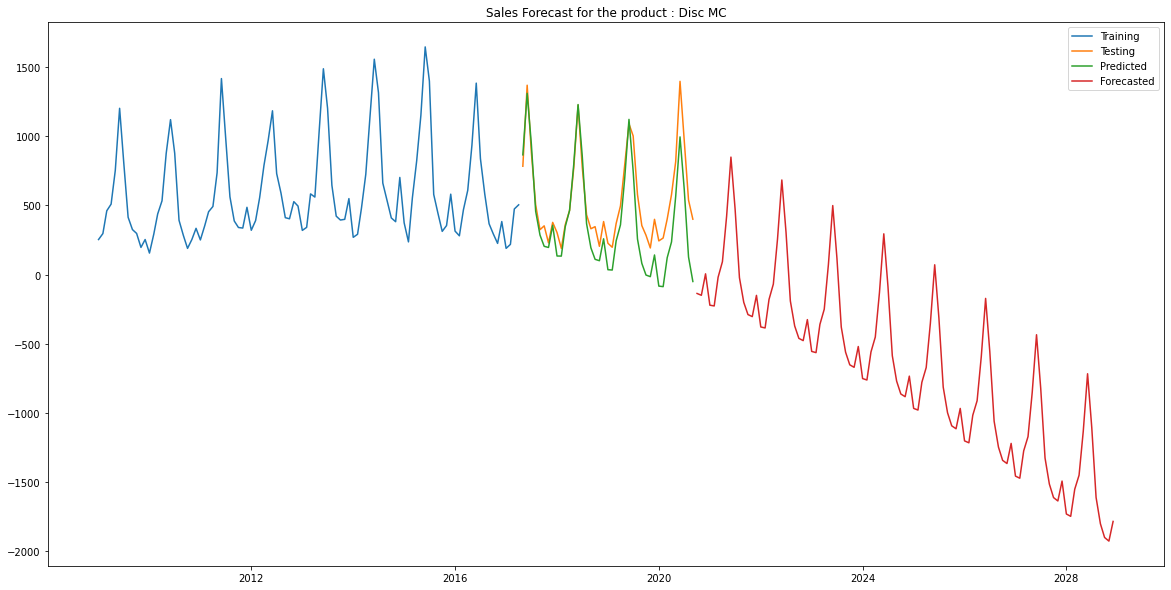

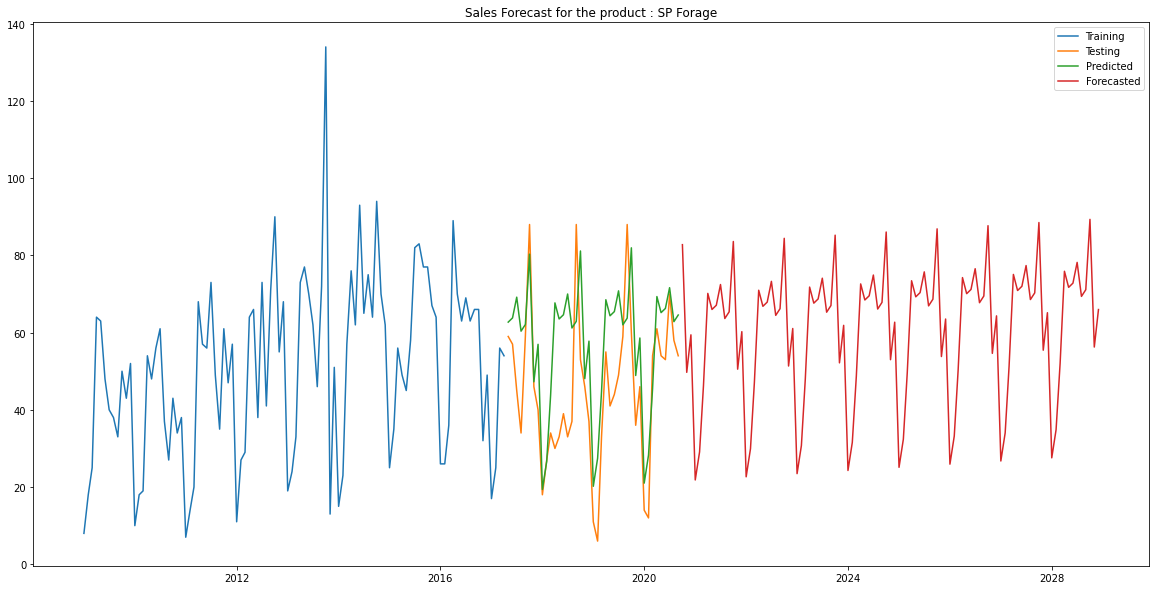

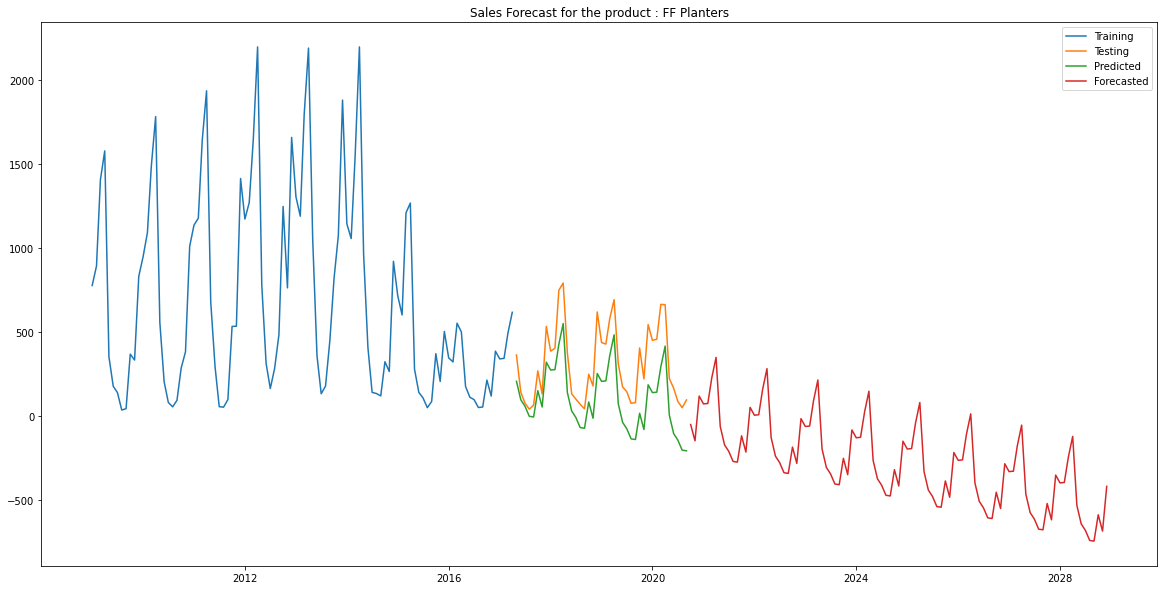

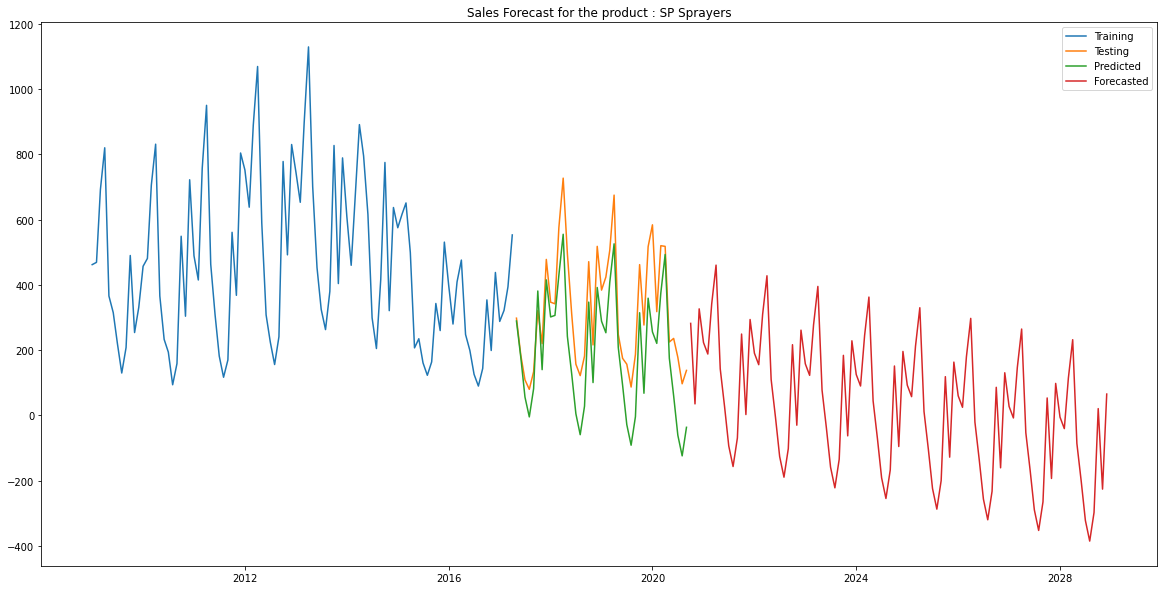

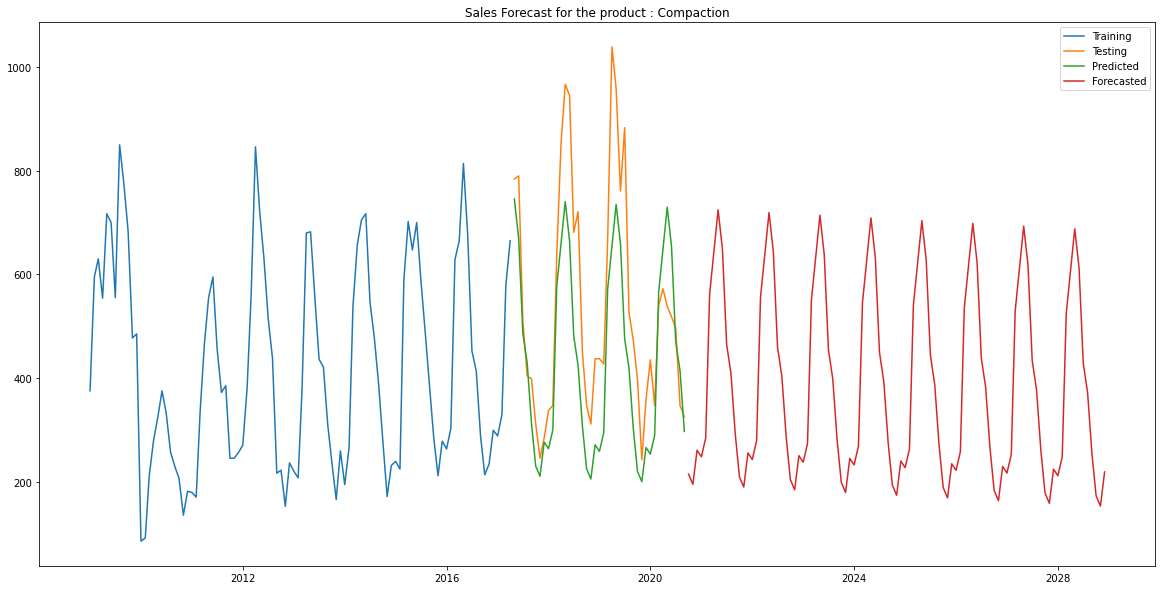

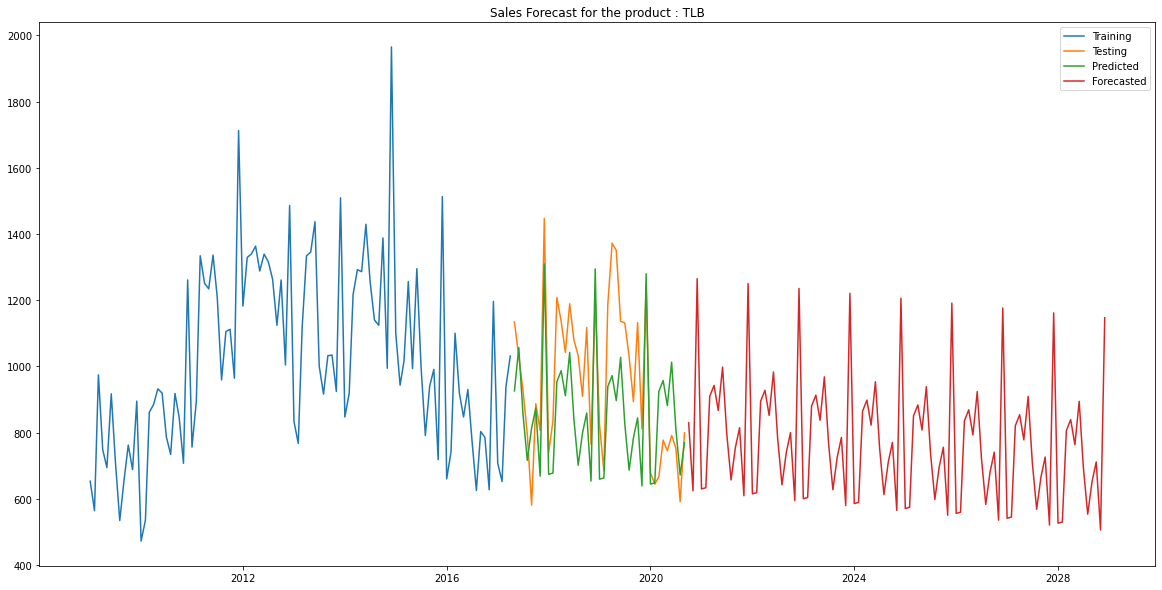

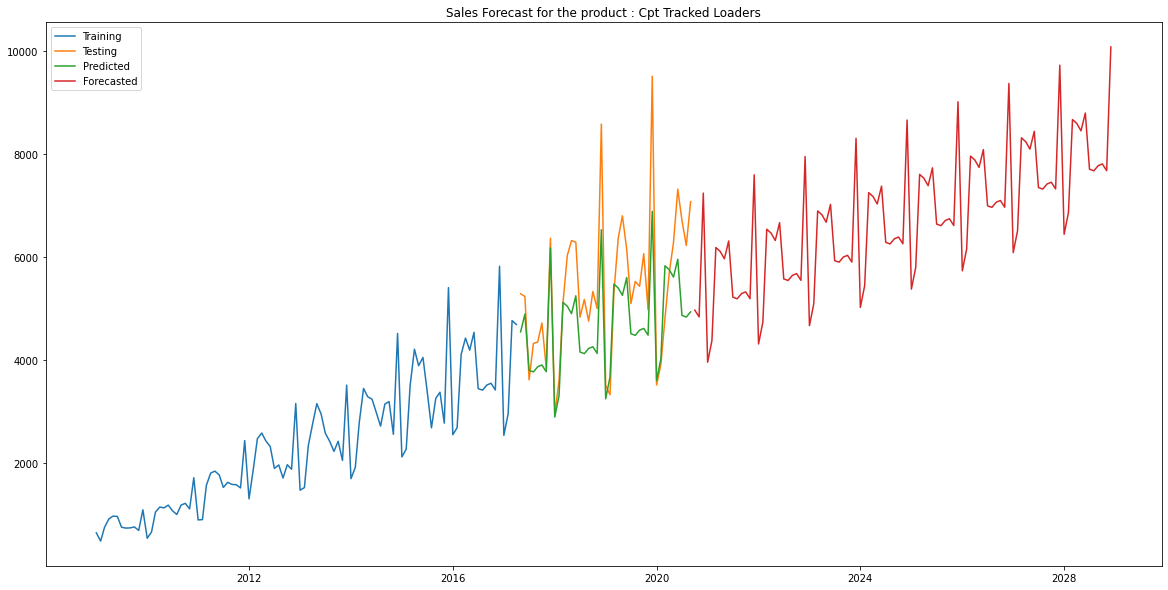

In [50]:
#Plotiing the Train-Test-Prediction and Future forecast sales for all the products:
plt.figure(figsize=(20,10))
plt.plot(split2.train2['Disc MC'],label='Training')
plt.plot(split2.test2['Disc MC'],label='Testing')
plt.plot(prediction_final2['Disc MC'],label='Predicted')
plt.plot(forecast_df2['Forecast_Disc MC'],label='Forecasted')
plt.title('Sales Forecast for the product : Disc MC')
plt.legend(loc='Left corner')
plt.show()

#############################################################

plt.figure(figsize=(20,10))
plt.plot(split2.train2['SP Forage'],label='Training')
plt.plot(split2.test2['SP Forage'],label='Testing')
plt.plot(prediction_final2['SP Forage'],label='Predicted')
plt.plot(forecast_df2['Forecast_SP Forage'],label='Forecasted')
plt.title('Sales Forecast for the product : SP Forage')
plt.legend(loc='Left corner')
plt.show()

#############################################################

plt.figure(figsize=(20,10))
plt.plot(split2.train2['FF Planters'],label='Training')
plt.plot(split2.test2['FF Planters'],label='Testing')
plt.plot(prediction_final2['FF Planters'],label='Predicted')
plt.plot(forecast_df2['Forecast_FF Planters'],label='Forecasted')
plt.title('Sales Forecast for the product : FF Planters')
plt.legend(loc='Left corner')
plt.show()

#############################################################

plt.figure(figsize=(20,10))
plt.plot(split2.train2['SP Sprayers'],label='Training')
plt.plot(split2.test2['SP Sprayers'],label='Testing')
plt.plot(prediction_final2['SP Sprayers'],label='Predicted')
plt.plot(forecast_df2['Forecast_SP Sprayers'],label='Forecasted')
plt.title('Sales Forecast for the product : SP Sprayers')
plt.legend(loc='Left corner')
plt.show()

#############################################################

plt.figure(figsize=(20,10))
plt.plot(split2.train2['Compaction'],label='Training')
plt.plot(split2.test2['Compaction'],label='Testing')
plt.plot(prediction_final2['Compaction'],label='Predicted')
plt.plot(forecast_df2['Forecast_Compaction'],label='Forecasted')
plt.title('Sales Forecast for the product : Compaction')
plt.legend(loc='Left corner')
plt.show()

#############################################################

plt.figure(figsize=(20,10))
plt.plot(split2.train2['TLB'],label='Training')
plt.plot(split2.test2['TLB'],label='Testing')
plt.plot(prediction_final2['TLB'],label='Predicted')
plt.plot(forecast_df2['Forecast_TLB'],label='Forecasted')
plt.title('Sales Forecast for the product : TLB')
plt.legend(loc='Left corner')
plt.show()

#############################################################

plt.figure(figsize=(20,10))
plt.plot(split2.train2['Cpt Tracked Loaders'],label='Training')
plt.plot(split2.test2['Cpt Tracked Loaders'],label='Testing')
plt.plot(prediction_final2['Cpt Tracked Loaders'],label='Predicted')
plt.plot(forecast_df2['Forecast_Cpt Tracked Loaders'],label='Forecasted')
plt.title('Sales Forecast for the product : Cpt Tracked Loaders')
plt.legend(loc='Left corner')
plt.show()

#############################################################

In [51]:
#Forecast Dataframe 1:
forecast_df.head()

Forecast_Tractors 0-20  ...  Forecast_RT Forklifts
dRan2                               ...                       
2020-10-01             8973.037519  ...             106.600164
2020-11-01             6516.630279  ...              88.373898
2020-12-01             7183.360811  ...             106.457178
2021-01-01             6465.253480  ...              76.895198
2021-02-01             6603.886784  ...             104.679520

[5 rows x 21 columns]

In [52]:
#Forecast Dataframe 2:
forecast_df2.head()

Forecast_Disc MC  ...  Forecast_Cpt Tracked Loaders
dRan2                         ...                              
2020-10-01       -137.054073  ...                   4964.983489
2020-11-01       -150.224150  ...                   4833.983489
2020-12-01          4.915586  ...                   7235.983489
2021-01-01       -221.822832  ...                   3953.983489
2021-02-01       -227.382986  ...                   4375.983489

[5 rows x 7 columns]

In [53]:
#Final Forecast Dataframe:
df_forecast_final = pd.merge(left=forecast_df, right=forecast_df2, left_on='dRan2', right_on='dRan2')
df_forecast_final

Forecast_Tractors 0-20  ...  Forecast_Cpt Tracked Loaders
dRan2                               ...                              
2020-10-01             8973.037519  ...                   4964.983489
2020-11-01             6516.630279  ...                   4833.983489
2020-12-01             7183.360811  ...                   7235.983489
2021-01-01             6465.253480  ...                   3953.983489
2021-02-01             6603.886784  ...                   4375.983489
...                            ...  ...                           ...
2028-08-01            13585.058903  ...                   7668.950466
2028-09-01            14305.188878  ...                   7768.950466
2028-10-01            14480.178392  ...                   7802.950466
2028-11-01            12024.015953  ...                   7671.950466
2028-12-01            12690.668243  ...                  10073.950466

[99 rows x 28 columns]

In [54]:
#Exporting the final forecast sales into a csv:
df_forecast_final.to_csv(r'Documents\Forecast_Sales.csv', index=True,header=True)